# MILESTONE 1

IMPORT

In [1]:
# Core Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Preprocessing
from sklearn.preprocessing import (
    LabelEncoder, OneHotEncoder, OrdinalEncoder,
    MinMaxScaler, StandardScaler, RobustScaler,
    Binarizer, Normalizer, PolynomialFeatures
)
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, FeatureUnion

# Sampling Techniques (Imbalanced Data)
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, NearMiss
from imblearn.combine import SMOTETomek, SMOTEENN

# Feature Selection
from sklearn.feature_selection import (
    SelectKBest, f_classif, mutual_info_classif,
    RFE, SelectFromModel, VarianceThreshold
)

# Dimensionality Reduction
from sklearn.decomposition import PCA, TruncatedSVD, KernelPCA, NMF
from sklearn.manifold import TSNE, Isomap
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Outlier Detection & Statistical Tools
from sklearn.covariance import EllipticEnvelope
from scipy.stats import skew, kurtosis, zscore, chi2_contingency

# Clustering
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture

# Model Selection & Evaluation
from sklearn.model_selection import (
    train_test_split, GridSearchCV, RandomizedSearchCV,
    StratifiedKFold, KFold, cross_val_score, cross_validate
)
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score,
    roc_curve, precision_recall_curve, mean_squared_error,
    mean_absolute_error, r2_score, log_loss
)

# Classical ML Models
from sklearn.linear_model import (
    LogisticRegression, RidgeClassifier, Lasso, ElasticNet,
    SGDClassifier, Perceptron, PassiveAggressiveClassifier
)
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import (
    RandomForestClassifier, ExtraTreesClassifier,
    GradientBoostingClassifier, AdaBoostClassifier,
    BaggingClassifier, VotingClassifier, StackingClassifier
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import (
    GaussianNB, MultinomialNB, BernoulliNB, ComplementNB
)
from sklearn.neural_network import MLPClassifier

# Advanced ML & Boosting Libraries
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Calibration & Probabilistic Models
from sklearn.calibration import CalibratedClassifierCV
from sklearn.gaussian_process import GaussianProcessClassifier

# Utilities
from sklearn.exceptions import ConvergenceWarning
from joblib import dump, load
import time, os
import itertools
import shutil
from sklearn.feature_selection import chi2


LOAD

In [2]:
import pandas as pd


# Define file paths
train_file_path = "/kaggle/input/System-Threat-Forecaster/train.csv"
test_file_path = "/kaggle/input/System-Threat-Forecaster/test.csv"


# Load datasets
train_data = pd.read_csv(train_file_path)
test_data = pd.read_csv(test_file_path)

# Display basic information about the datasets
print("Training Data Shape:", train_data.shape)
print("Test Data Shape:", test_data.shape)

Training Data Shape: (100000, 76)
Test Data Shape: (10000, 75)


In [3]:
# Display first 5 rows of training data
print("First five rows of training data:")
print(train_data.head())

# Display first 5 rows of test data
print("\nFirst five rows of test data:")
print(test_data.head())

# Show dataset info
print("\nTraining Data Info:")
print(train_data.describe(include='all'))

print("\nTest Data Info:")
print(test_data.describe(include='all'))

First five rows of training data:
                          MachineID   ProductName EngineVersion  \
0  f541bae429089117c4aac39c90dd3416  win8defender   1.1.15200.1   
1  dc2b14d9ce3a0ce4050bb640190f2ca5  win8defender   1.1.15100.1   
2  fd20c5f010e9c5f91ad1c6b3e0da68a0  win8defender   1.1.15200.1   
3  38711eae85eb77a72ec5dfdf27eb2a76  win8defender   1.1.15200.1   
4  32607c9a543a9214e2c7e45800ed4849  win8defender   1.1.15200.1   

         AppVersion SignatureVersion  IsBetaUser  RealTimeProtectionState  \
0   4.18.1807.18075     1.275.1003.0           0                      7.0   
1   4.18.1807.18075     1.273.1465.0           0                      7.0   
2   4.18.1807.18075     1.275.1546.0           0                      7.0   
3  4.12.17007.18011     1.275.1141.0           0                      7.0   
4    4.13.17134.228     1.275.1283.0           0                      7.0   

   IsPassiveModeEnabled  AntivirusConfigID  NumAntivirusProductsInstalled  \
0                     0

PRE-PROCESS


In [4]:
# Count missing values in each column
missing_train = train_data.isnull().sum()
missing_test = test_data.isnull().sum()

# Calculate percentage of missing values
missing_train_percent = (missing_train / len(train_data)) * 100
missing_test_percent = (missing_test / len(test_data)) * 100

# Filter columns with missing values
missing_train = missing_train[missing_train > 0]
missing_test = missing_test[missing_test > 0]
missing_train_percent = missing_train_percent[missing_train_percent > 0]
missing_test_percent = missing_test_percent[missing_test_percent > 0]

print("\nMissing values in training data:")
print(pd.DataFrame({'Missing Values': missing_train, 'Percentage': missing_train_percent}))

print("\nMissing values in test data:")
print(pd.DataFrame({'Missing Values': missing_test, 'Percentage': missing_test_percent}))

# Display data types of each column
print("\nData types in training data:")
print(train_data.dtypes)

print("\nData types in test data:")
print(test_data.dtypes)

# Display basic statistics for numerical columns
print("\nBasic statistics for numerical columns in training data:")
print(train_data.describe())

print("\nBasic statistics for numerical columns in test data:")
print(test_data.describe())

# Display basic statistics for categorical columns
print("\nBasic statistics for categorical columns in training data:")
print(train_data.describe(include=['O']))

print("\nBasic statistics for categorical columns in test data:")
print(test_data.describe(include=['O']))


Missing values in training data:
                                    Missing Values  Percentage
RealTimeProtectionState                         66       0.066
AntivirusConfigID                               76       0.076
NumAntivirusProductsInstalled                   76       0.076
NumAntivirusProductsEnabled                     76       0.076
CityID                                         623       0.623
IsSystemProtected                               76       0.076
SMode                                          981       0.981
IEVersionID                                    107       0.107
FirewallEnabled                                166       0.166
EnableLUA                                       19       0.019
OEMNameID                                      212       0.212
OEMModelID                                     228       0.228
ProcessorCoreCount                              85       0.085
ProcessorManufacturerID                         85       0.085
ProcessorModelID     

In [5]:

def drop_high_missing(df, threshold=0.7):
    """Remove columns with too many missing values."""
    return df.loc[:, df.isnull().mean() < threshold]

def impute_numerical(df):
    """Fill missing numerical values with median."""
    num_cols = df.select_dtypes(include='number').columns
    df[num_cols] = SimpleImputer(strategy='median').fit_transform(df[num_cols])
    return df

def impute_categorical(df):
    """Fill missing categorical values with most frequent."""
    cat_cols = df.select_dtypes(include='object').columns
    df[cat_cols] = SimpleImputer(strategy='most_frequent').fit_transform(df[cat_cols])
    return df

# Drop columns with 70%+ missing values
train_data = drop_high_missing(train_data, 0.7)
test_data = drop_high_missing(test_data, 0.7)

# Impute missing values
train_data = impute_numerical(train_data)
train_data = impute_categorical(train_data)

test_data = impute_numerical(test_data)
test_data = impute_categorical(test_data)

# Check remaining missing values
print(f"Train missing: {train_data.isna().sum().sum()}, Test missing: {test_data.isna().sum().sum()}")


Train missing: 0, Test missing: 0


Exploratory Data Analysis (EDA)

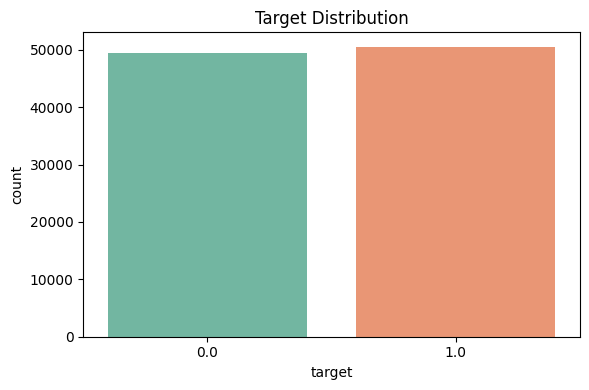

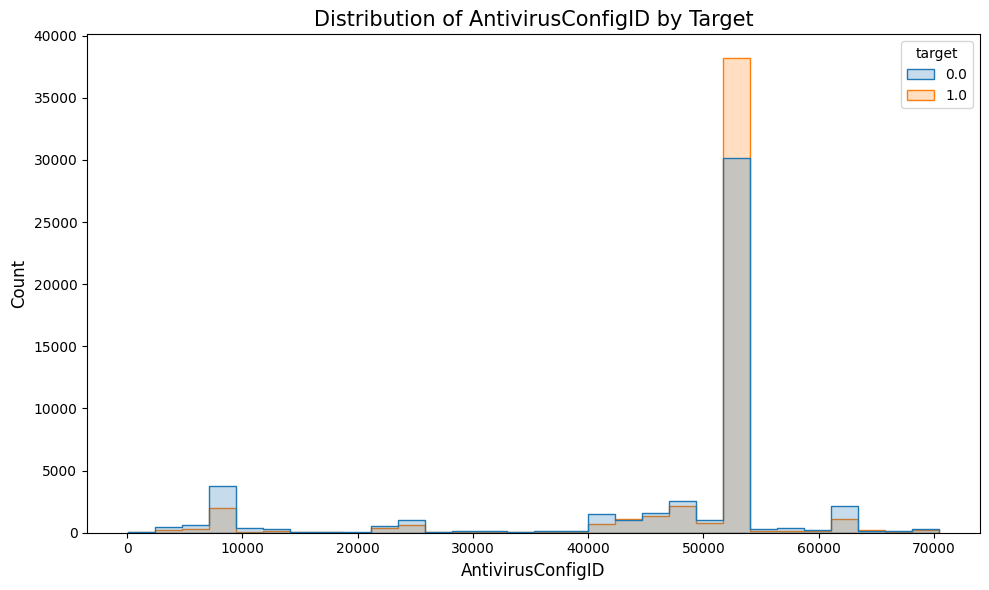

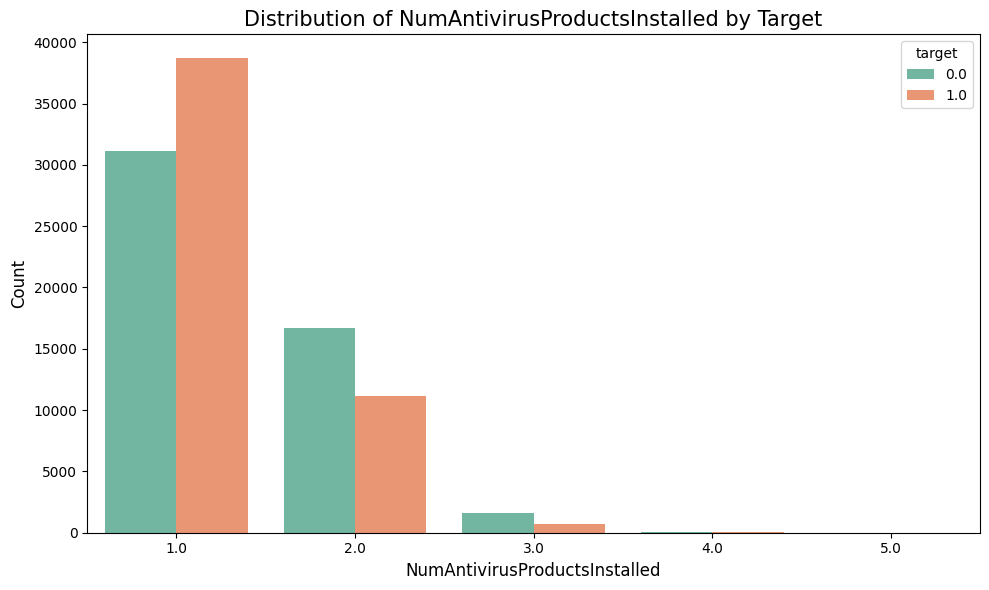

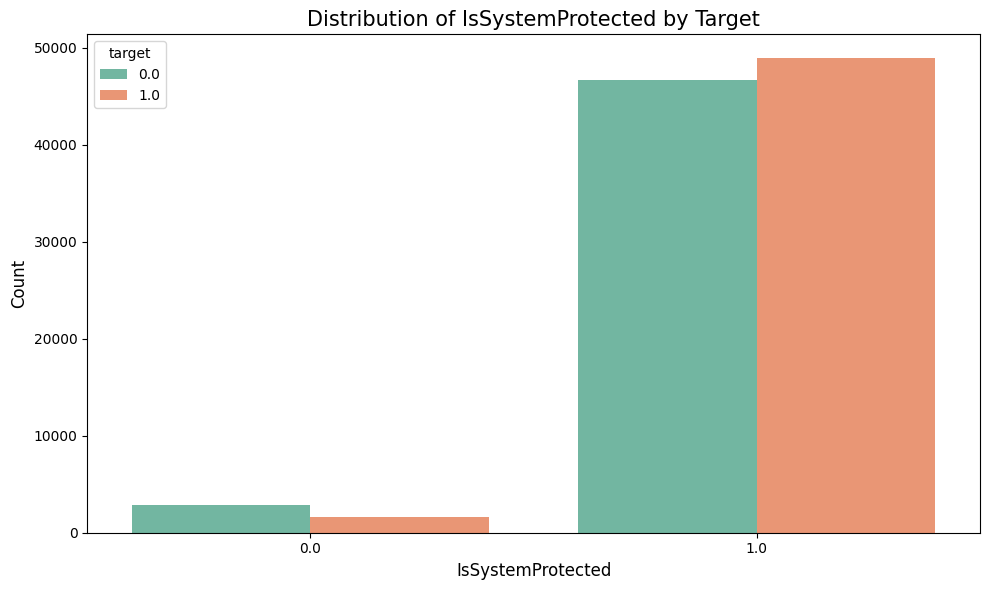

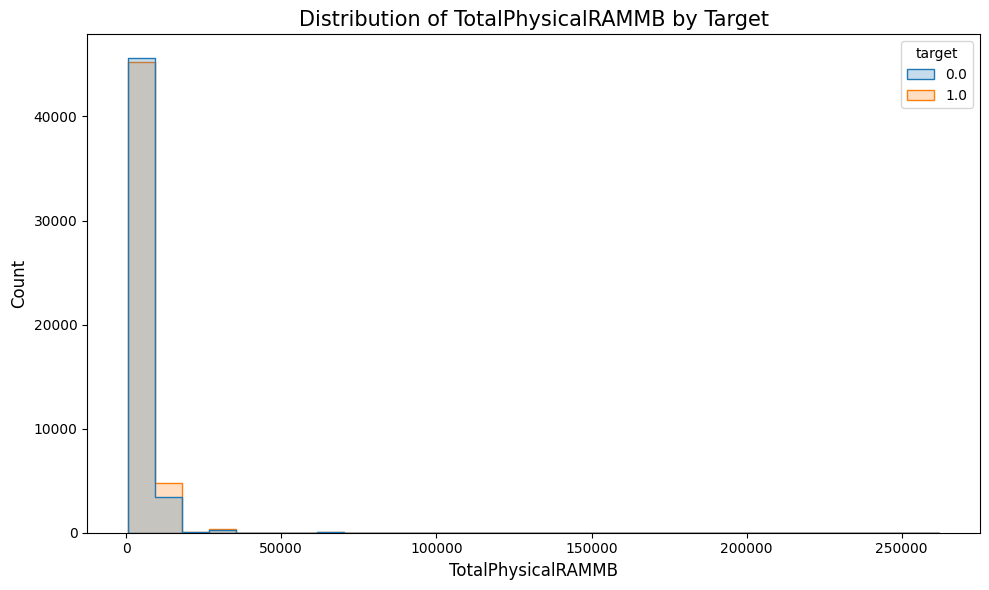

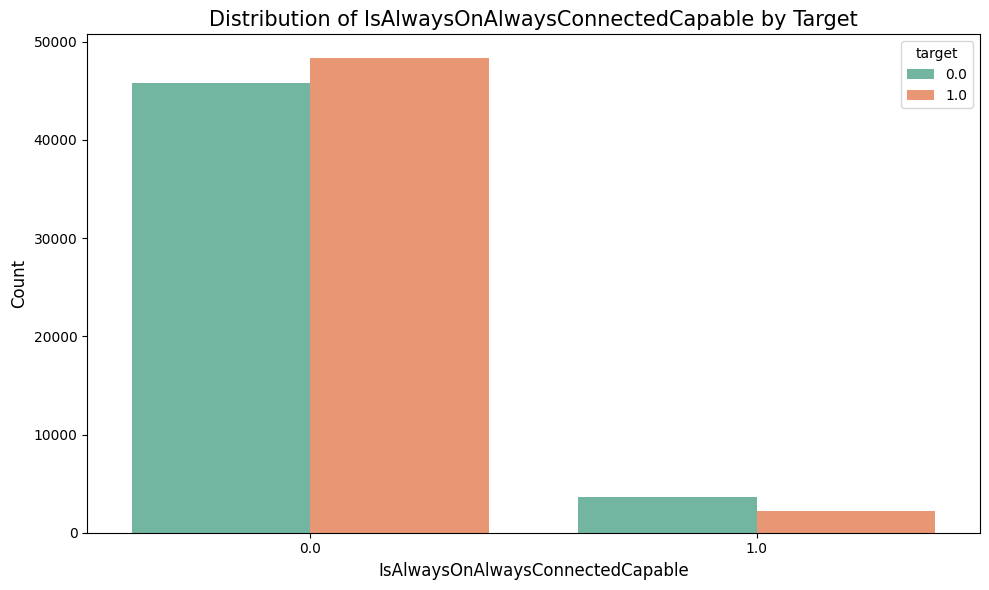

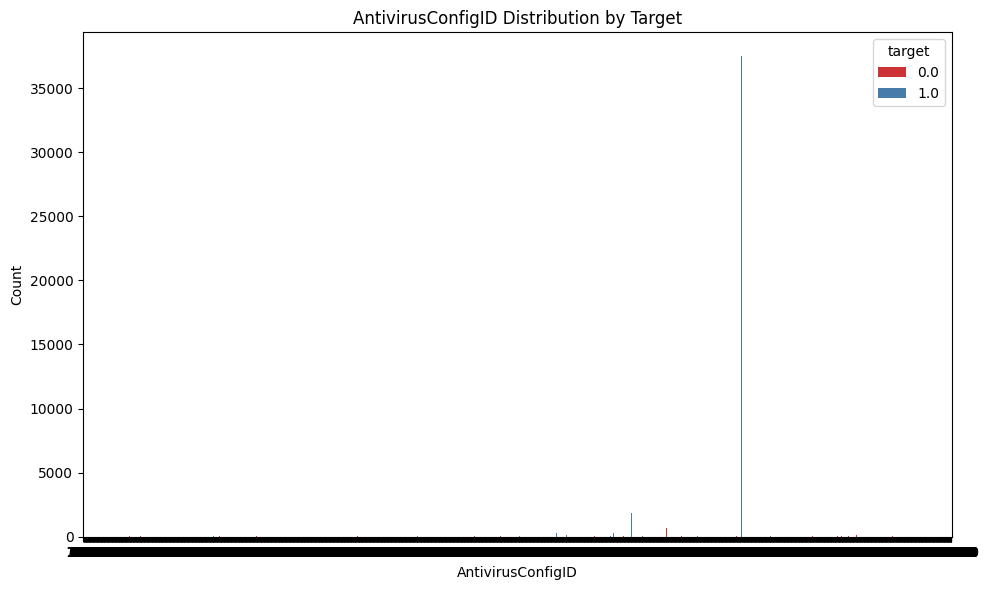

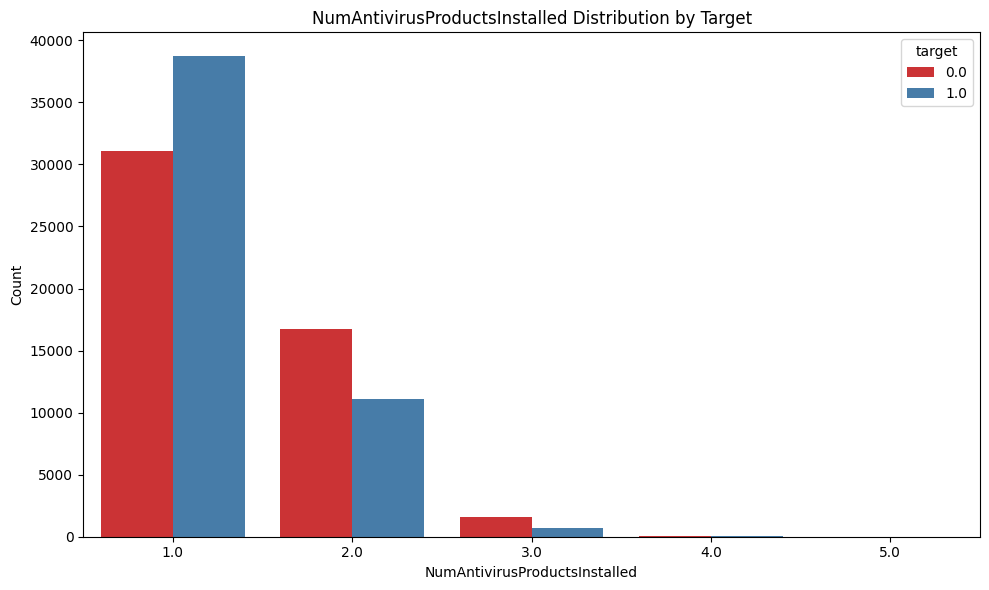

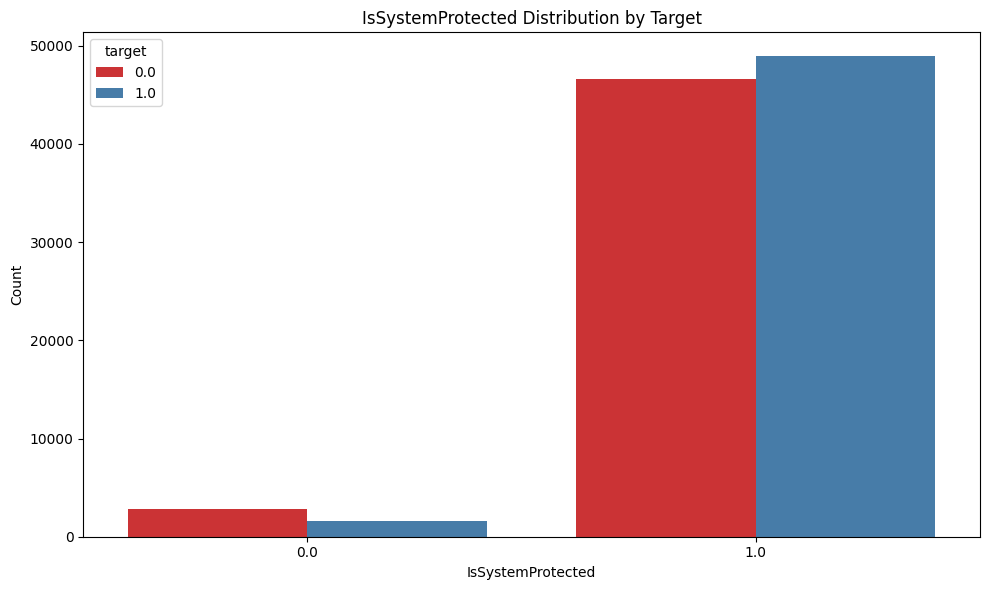

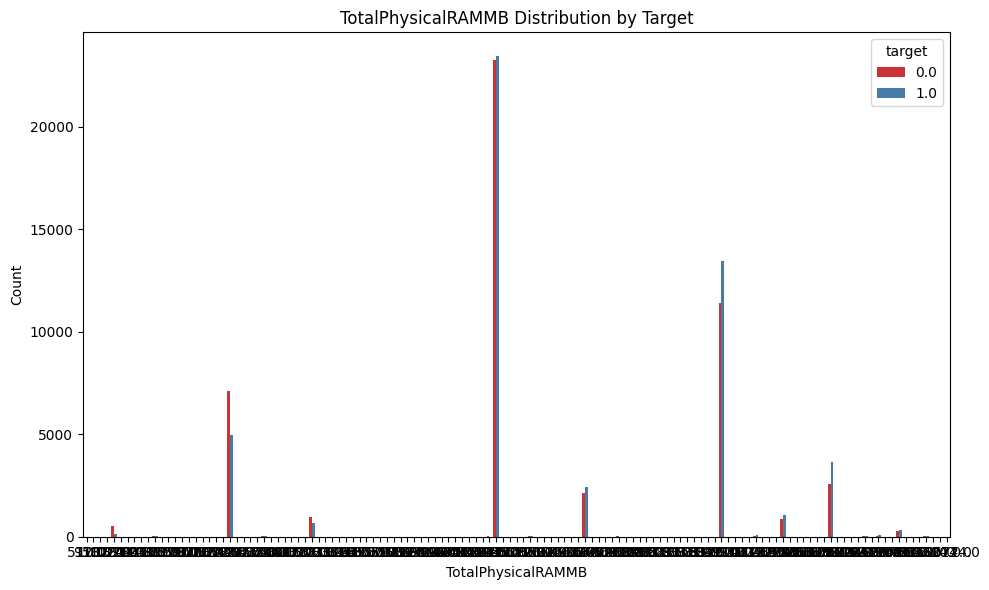

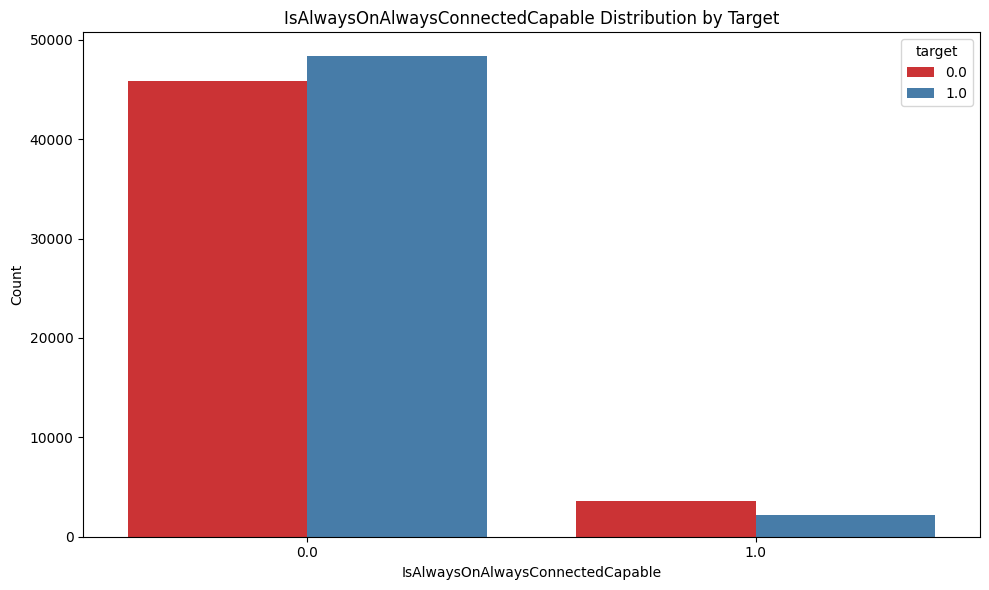

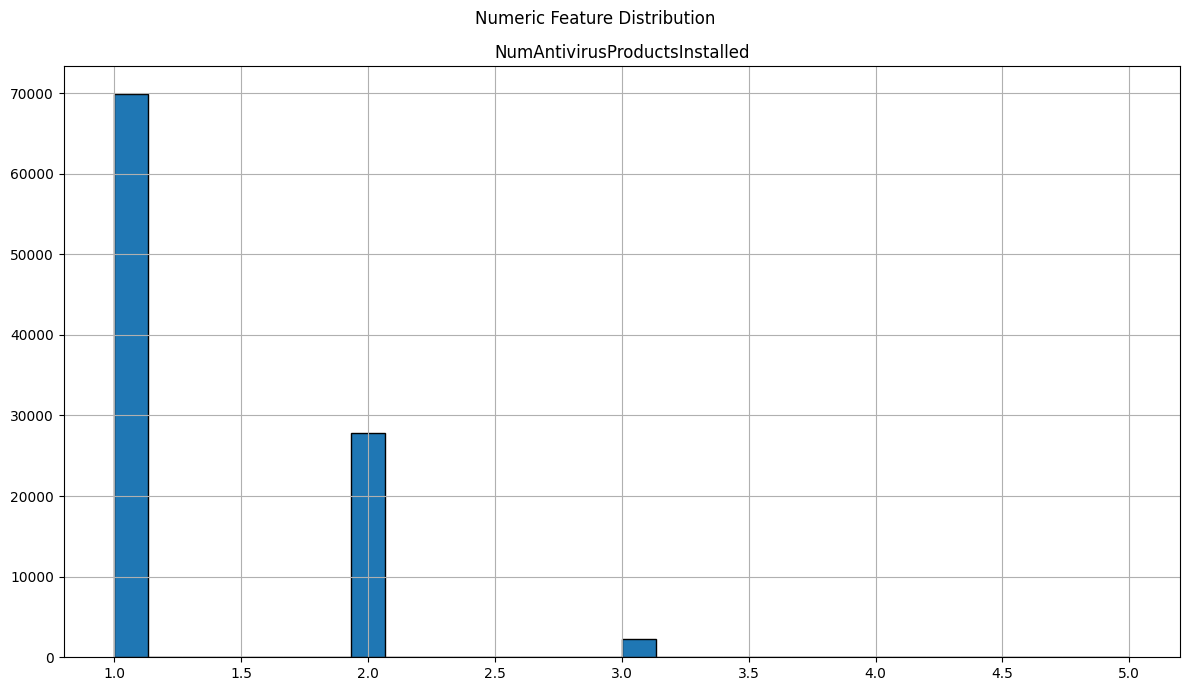

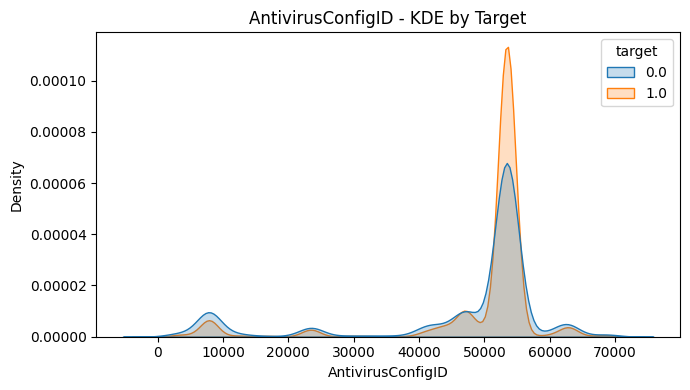

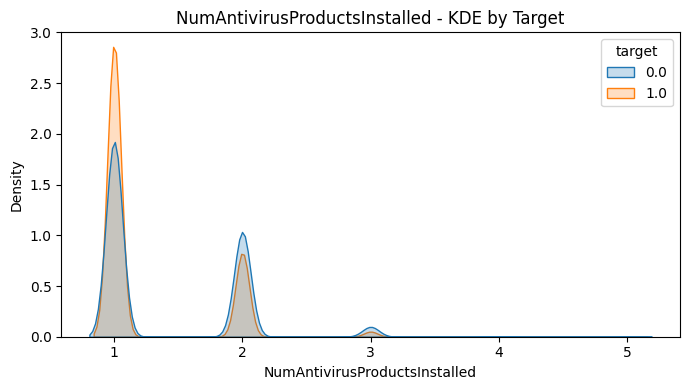

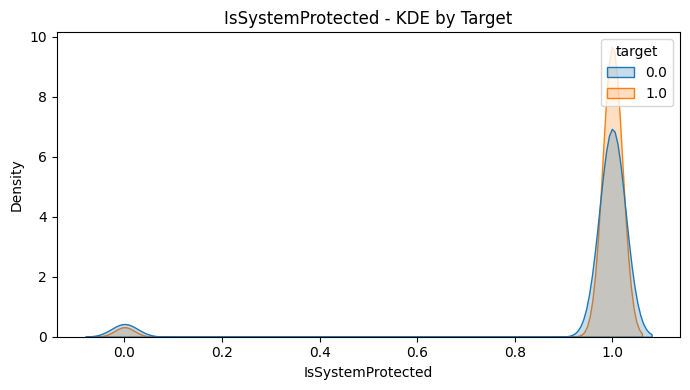

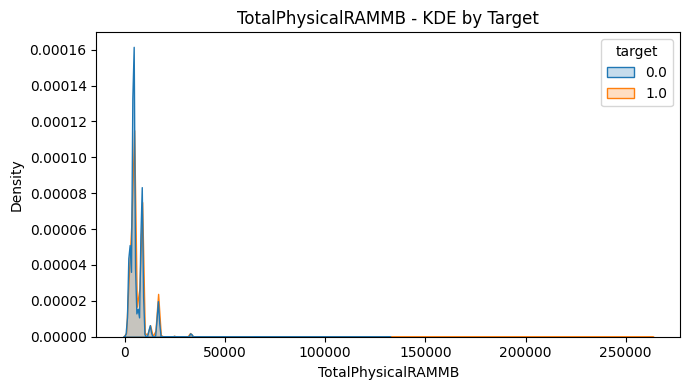

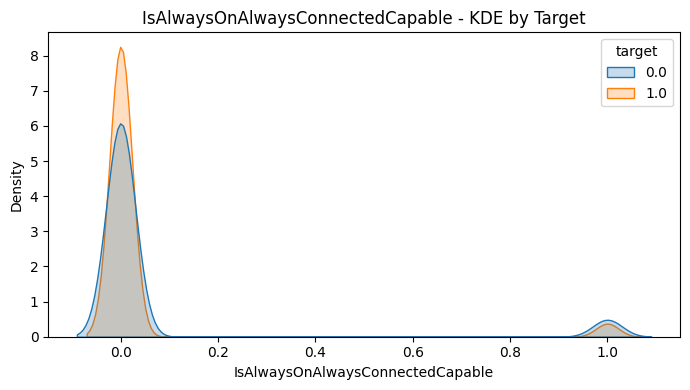

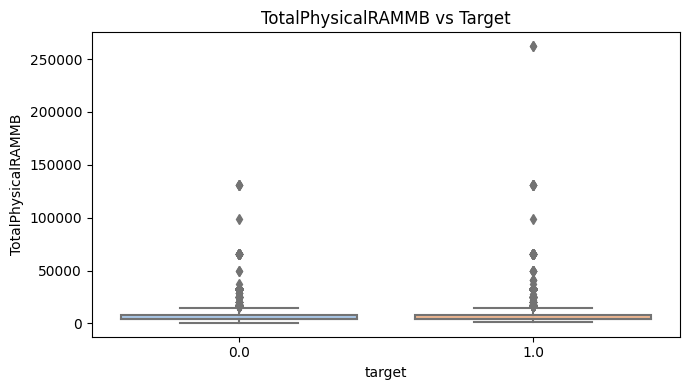

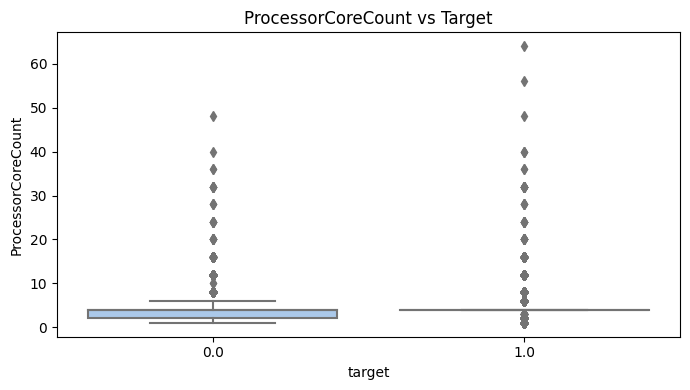

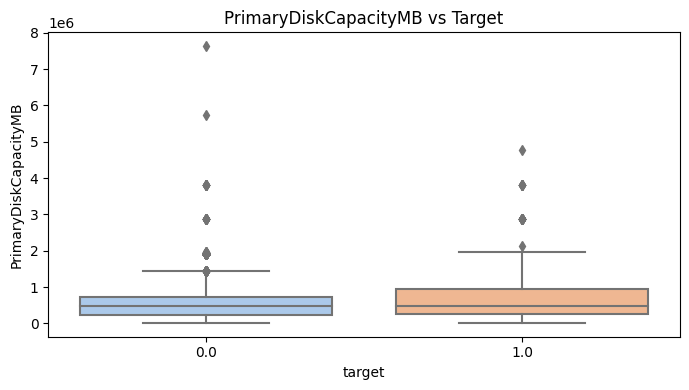

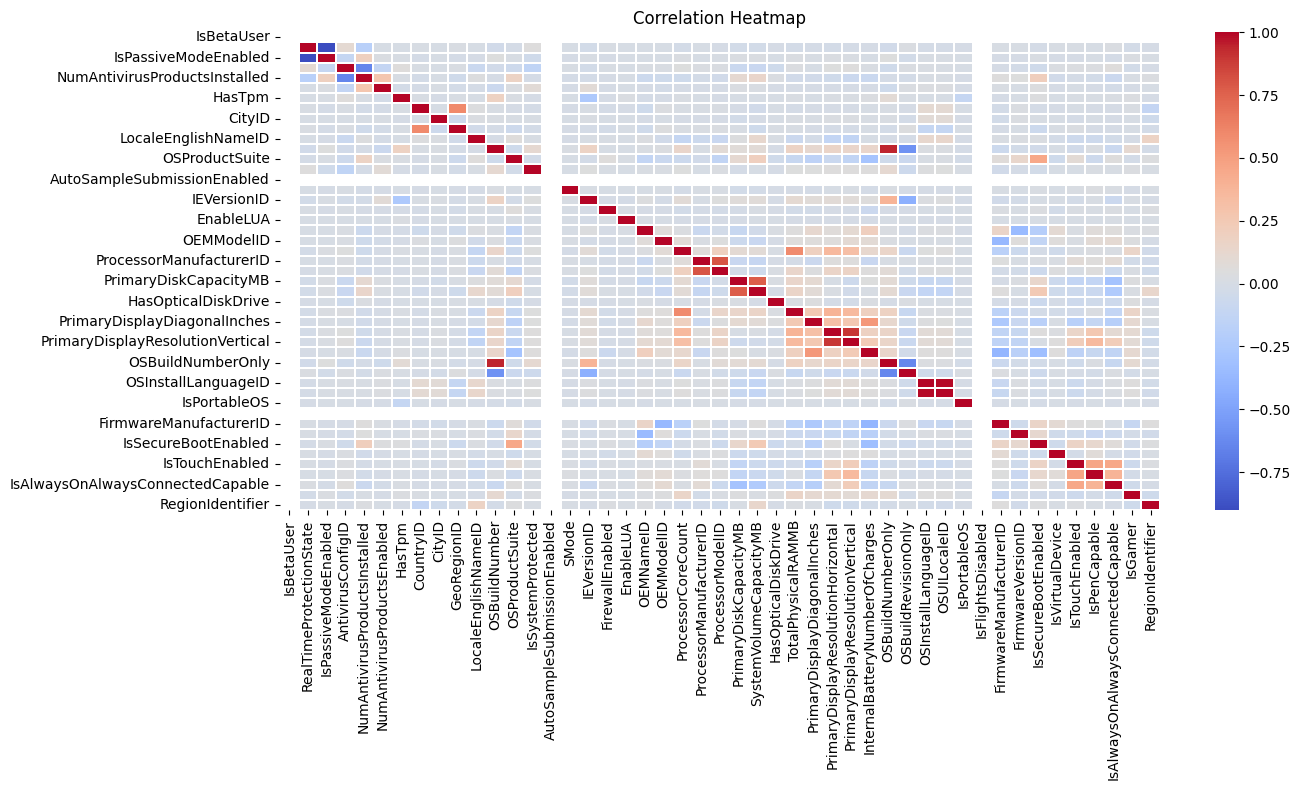

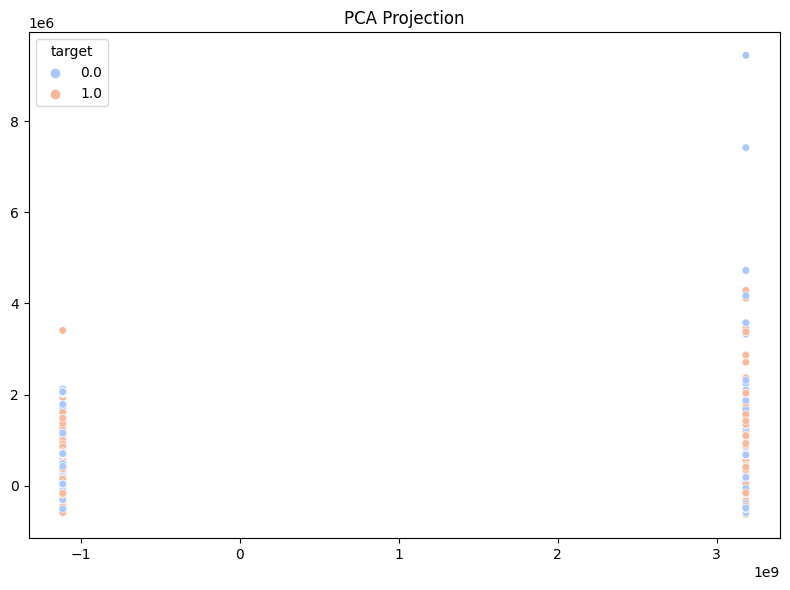

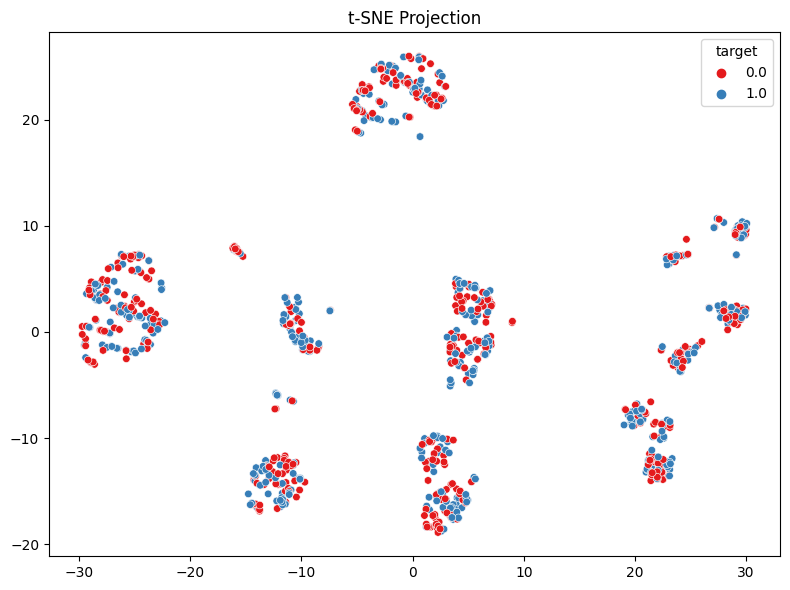


Skewness and Kurtosis:
IsBetaUser                          | Skew: nan | Kurtosis: nan
RealTimeProtectionState             | Skew: -6.53 | Kurtosis: 41.01
IsPassiveModeEnabled                | Skew: 7.33 | Kurtosis: 51.77
AntivirusConfigID                   | Skew: -2.17 | Kurtosis: 3.60
NumAntivirusProductsInstalled       | Skew: 1.32 | Kurtosis: 1.06
NumAntivirusProductsEnabled         | Skew: 5.55 | Kurtosis: 50.43
HasTpm                              | Skew: -17.54 | Kurtosis: 305.56
CountryID                           | Skew: 0.15 | Kurtosis: -1.26
CityID                              | Skew: -0.02 | Kurtosis: -1.19
GeoRegionID                         | Skew: -0.22 | Kurtosis: -1.38

Outlier Count (Z-score > 3):
IsBetaUser                          | Outliers: 0
RealTimeProtectionState             | Outliers: 2143
IsPassiveModeEnabled                | Outliers: 1762
AntivirusConfigID                   | Outliers: 1209
NumAntivirusProductsInstalled       | Outliers: 2351
NumAntivirus

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
MachineID,100000,99835,8e0523438a5ca48323f50b2c47f6d31a,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductName,100000,2,win8defender,99771,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EngineVersion,100000,37,1.1.15200.1,45219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AppVersion,100000,69,4.18.1807.18075,62119,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SignatureVersion,100000,2735,1.273.1420.0,1274,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
IsGamer,100000.0,NaN,NaN,NaN,0.29501,0.45605,0.0,0.0,0.0,1.0,1.0
RegionIdentifier,100000.0,NaN,NaN,NaN,7.88774,4.552519,1.0,3.0,10.0,11.0,15.0
DateAS,100000,2695,2018-08-15 06:29:00,1274,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DateOS,100000,112,2018-08-14,20929,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Test Data Summary:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
MachineID,10000,9998,f8552815f215d99bd5c0db06e09afb0a,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductName,10000,2,win8defender,9972,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EngineVersion,10000,31,1.1.15200.1,4501,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AppVersion,10000,59,4.18.1807.18075,6169,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SignatureVersion,10000,1438,1.273.1420.0,133,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
IsAlwaysOnAlwaysConnectedCapable,10000.0,NaN,NaN,NaN,0.0564,0.230704,0.0,0.0,0.0,0.0,1.0
IsGamer,10000.0,NaN,NaN,NaN,0.2992,0.45793,0.0,0.0,0.0,1.0,1.0
RegionIdentifier,10000.0,NaN,NaN,NaN,7.9192,4.510998,1.0,3.0,10.0,11.0,15.0
DateAS,10000,1413,2018-08-15 06:29:00,133,NaN,NaN,NaN,NaN,NaN,NaN,NaN



MachineID Value Counts (Train):
MachineID
8e0523438a5ca48323f50b2c47f6d31a    2
0ca2c7ebe3921b5e74d8a030646ee9c2    2
43628a7db99daf5bf8ca8a3f36058ea4    2
bb11a6869fb4ec76797e97ae3006c833    2
a5f52a788ea2e509572369585ddd05c9    2
Name: count, dtype: int64

ProductName Value Counts (Train):
ProductName
win8defender    99771
mse               229
Name: count, dtype: int64

EngineVersion Value Counts (Train):
EngineVersion
1.1.15200.1    45219
1.1.15100.1    44017
1.1.15000.2     3169
1.1.14901.4     2597
1.1.14800.3     1719
Name: count, dtype: int64

AppVersion Value Counts (Train):
AppVersion
4.18.1807.18075     62119
4.18.1806.18062     10473
4.12.16299.15        3234
4.16.17656.18052     2943
4.14.17639.18041     2490
Name: count, dtype: int64

SignatureVersion Value Counts (Train):
SignatureVersion
1.273.1420.0    1274
1.275.1140.0    1146
1.273.371.0     1068
1.275.727.0     1045
1.273.1826.0     997
Name: count, dtype: int64

PlatformType Value Counts (Train):
PlatformType
wind

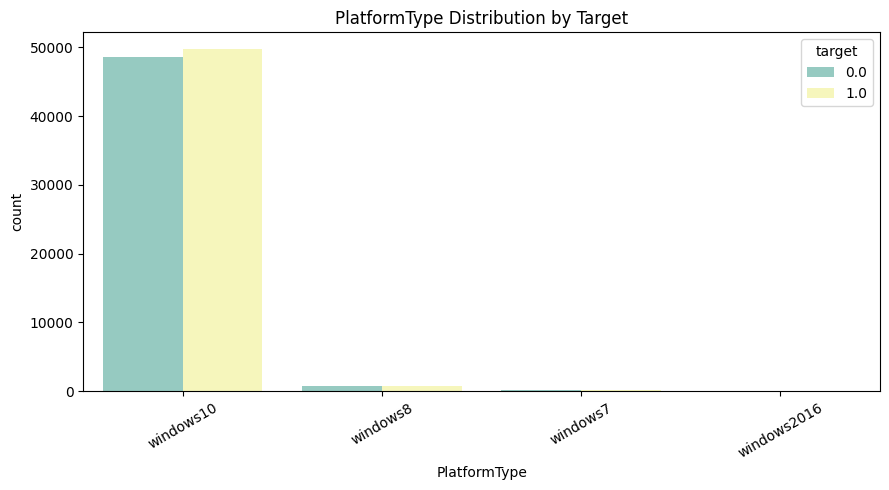

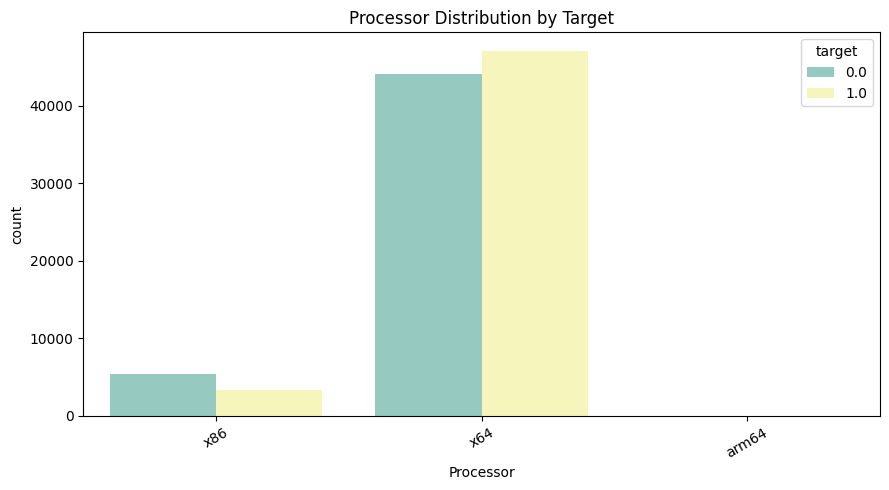

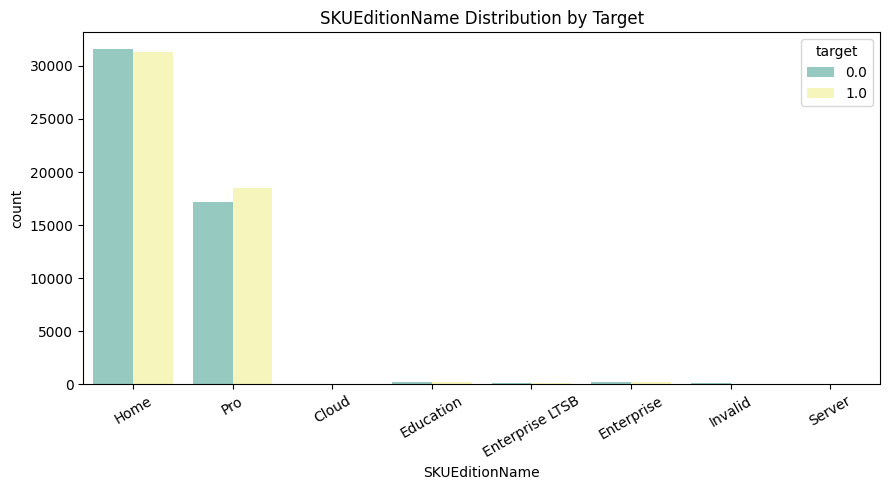


Chi-Square Test Results (Top 10 Categorical Features):


,Chi2 Score,p-value
OSArchitecture,969.101407,9.345696e-213
OSSkuFriendlyName,338.525830,1.336351e-75
OSEdition,317.973197,4.003015e-71
PowerPlatformRole,128.058047,1.090077e-29
PrimaryDiskType,60.455647,7.525517e-15
Processor,39.400142,3.452719e-10
OSBranch,39.191193,3.842696e-10
LicenseActivationChannel,25.362746,4.750034e-07
AutoUpdateOptionsName,20.509300,5.934223e-06
OsPlatformSubRelease,16.514167,4.828792e-05


In [6]:
# Target distribution
if 'target' in train_data.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x='target', data=train_data, palette='Set2')
    plt.title("Target Distribution")
    plt.tight_layout()
    plt.show()

# Numerical features
num_cols = train_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'target' in num_cols:
    num_cols.remove('target')

#top 5 features
top5_features = ['AntivirusConfigID', 
                 'NumAntivirusProductsInstalled', 
                 'IsSystemProtected', 
                 'TotalPhysicalRAMMB', 
                 'IsAlwaysOnAlwaysConnectedCapable']

# Plot each feature's distribution by target
for feature in top5_features:
    if feature in train_data.columns and 'target' in train_data.columns:
        plt.figure(figsize=(10, 6))
        # Use countplot for discrete/categorical and histogram for continuous
        if train_data[feature].nunique() <= 10 or train_data[feature].dtype == 'int':
            sns.countplot(data=train_data, x=feature, hue='target', palette='Set2')
        else:
            sns.histplot(data=train_data, x=feature, hue='target', bins=30, kde=False, element='step')
        plt.title(f'Distribution of {feature} by Target', fontsize=15)
        plt.xlabel(feature, fontsize=12)
        plt.ylabel('Count', fontsize=12)
        plt.tight_layout()
        plt.show()

# Distribution plots for top 5 important numerical features by target
for feat in top5_features:
    if feat in train_data.columns:
        plt.figure(figsize=(10, 6))
        sns.countplot(data=train_data, x=feat, hue='target', palette='Set1')
        plt.title(f'{feat} Distribution by Target')
        plt.xlabel(feat)
        plt.ylabel('Count')
        plt.tight_layout()
        plt.show()

# Histogram for plottable numerical features
key_feats = ['EngineVersion', 'AppVersion', 'NumAntivirusProductsInstalled', 'OSVersion']
plottable = [col for col in key_feats if col in train_data.columns]
if plottable:
    train_data[plottable].hist(bins=30, figsize=(12, 7), edgecolor='black')
    plt.suptitle("Numeric Feature Distribution")
    plt.tight_layout()
    plt.show()

# KDE plots for top 5 features
for col in top5_features:
    plt.figure(figsize=(7, 4))
    sns.kdeplot(data=train_data, x=col, hue='target', fill=True)
    plt.title(f"{col} - KDE by Target")
    plt.tight_layout()
    plt.show()

# Boxplots
box_feats = ['TotalPhysicalRAMMB', 'ProcessorCoreCount', 'PrimaryDiskCapacityMB']
for feat in box_feats:
    if feat in train_data.columns and 'target' in train_data.columns:
        plt.figure(figsize=(7, 4))
        sns.boxplot(data=train_data, x='target', y=feat, palette='pastel')
        plt.title(f"{feat} vs Target")
        plt.tight_layout()
        plt.show()

# Correlation heatmap
if len(num_cols) >= 2:
    plt.figure(figsize=(14, 8))
    sns.heatmap(train_data[num_cols].corr(), cmap='coolwarm', linewidths=0.3)
    plt.title("Correlation Heatmap")
    plt.tight_layout()
    plt.show()

# PCA
if len(num_cols) >= 2:
    data_pca = train_data[num_cols].fillna(-1)
    pca = PCA(n_components=2)
    pca_components = pca.fit_transform(data_pca)
    plt.figure(figsize=(8, 6))
    if 'target' in train_data:
        sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=train_data['target'], palette='coolwarm', s=30)
    else:
        plt.scatter(pca_components[:, 0], pca_components[:, 1], s=20)
    plt.title("PCA Projection")
    plt.tight_layout()
    plt.show()

# t-SNE
if len(num_cols) >= 2:
    tsne = TSNE(n_components=2, random_state=42, perplexity=50, n_iter=500)
    tsne_sample = train_data[num_cols].fillna(-1).sample(1000, random_state=42)
    tsne_result = tsne.fit_transform(tsne_sample)
    plt.figure(figsize=(8, 6))
    if 'target' in train_data:
        target_sample = train_data.loc[tsne_sample.index, 'target']
        sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], hue=target_sample, palette='Set1', s=30)
    else:
        plt.scatter(tsne_result[:, 0], tsne_result[:, 1], s=20)
    plt.title("t-SNE Projection")
    plt.tight_layout()
    plt.show()



# Skewness and Kurtosis
print("\nSkewness and Kurtosis:")
for col in num_cols[:10]:
    sk = skew(train_data[col].dropna())
    kt = kurtosis(train_data[col].dropna())
    print(f"{col:35} | Skew: {sk:.2f} | Kurtosis: {kt:.2f}")

# Outlier detection
print("\nOutlier Count (Z-score > 3):")
for col in num_cols[:10]:
    z = np.abs(zscore(train_data[col].fillna(train_data[col].median())))
    outliers = (z > 3).sum()
    print(f"{col:35} | Outliers: {outliers}")

# Descriptive summary
print("\nTrain Data Summary:")
display(train_data.describe(include='all').T)

print("\nTest Data Summary:")
display(test_data.describe(include='all').T)

# Categorical feature value counts
cat_cols = train_data.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    print(f"\n{col} Value Counts (Train):")
    print(train_data[col].value_counts(dropna=False).head())

# Bar plots for selected categoricals
selected_cats = ['PlatformType', 'Processor', 'SKUEditionName']
for cat in selected_cats:
    if cat in train_data.columns and 'target' in train_data.columns:
        plt.figure(figsize=(9, 5))
        sns.countplot(data=train_data, x=cat, hue='target', palette='Set3')
        plt.title(f"{cat} Distribution by Target")
        plt.xticks(rotation=30)
        plt.tight_layout()
        plt.show()

# Chi-Square test for categorical features
print("\nChi-Square Test Results (Top 10 Categorical Features):")
label_encoders = {}
chi_scores = {}
for cat in cat_cols:
    if train_data[cat].nunique() <= 20:
        le = LabelEncoder()
        non_null = train_data[cat].fillna("Missing")
        label_encoders[cat] = le.fit_transform(non_null)
        chi2_val, p = chi2(pd.DataFrame(label_encoders[cat]), train_data['target'])
        chi_scores[cat] = (chi2_val[0], p[0])

chi_df = pd.DataFrame(chi_scores).T
chi_df.columns = ['Chi2 Score', 'p-value']
chi_df = chi_df.sort_values(by='Chi2 Score', ascending=False)
display(chi_df.head(10))

Train-Validation Split


In [7]:

if 'target' in train_data.columns:
    X = train_data.drop(columns=['target'])
    y = train_data['target']

    X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=0.25, stratify=y, random_state=1
    )

    print(f"Training set size: {X_train.shape}")
    print(f"Validation set size: {X_val.shape}")
else:
    print("Target column not found.")


Training set size: (75000, 75)
Validation set size: (25000, 75)


Data Cleaning/ Preprocessing and Baseline Model


Cleaning

In [8]:
# Copies
X_train_cleaned = X_train.copy()
X_val_cleaned = X_val.copy()
X_test_cleaned = test_data.copy()

# Feature types
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include='object').columns

# Numeric Imputation
knn_imputer = KNNImputer(n_neighbors=3, weights='distance')
X_train_cleaned[numeric_features] = knn_imputer.fit_transform(X_train[numeric_features])
X_val_cleaned[numeric_features] = knn_imputer.transform(X_val[numeric_features])
X_test_cleaned[numeric_features] = knn_imputer.transform(X_test_cleaned[numeric_features])

# Categorical Imputation
cat_imputer = SimpleImputer(strategy='most_frequent')
X_train_cleaned[categorical_features] = cat_imputer.fit_transform(X_train[categorical_features])
X_val_cleaned[categorical_features] = cat_imputer.transform(X_val[categorical_features])
X_test_cleaned[categorical_features] = cat_imputer.transform(X_test_cleaned[categorical_features])

# Scaling
scaler = RobustScaler()
X_train_cleaned[numeric_features] = scaler.fit_transform(X_train_cleaned[numeric_features])
X_val_cleaned[numeric_features] = scaler.transform(X_val_cleaned[numeric_features])
X_test_cleaned[numeric_features] = scaler.transform(X_test_cleaned[numeric_features])

# Encoding
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X_train_cleaned[categorical_features] = encoder.fit_transform(X_train_cleaned[categorical_features])
X_val_cleaned[categorical_features] = encoder.transform(X_val_cleaned[categorical_features])
X_test_cleaned[categorical_features] = encoder.transform(X_test_cleaned[categorical_features])

# Feature Selection
selector = VarianceThreshold(threshold=0.01)
X_train_cleaned = pd.DataFrame(selector.fit_transform(X_train_cleaned), columns=np.array(X_train_cleaned.columns)[selector.get_support()])
X_val_cleaned = pd.DataFrame(selector.transform(X_val_cleaned), columns=X_train_cleaned.columns)
X_test_cleaned = pd.DataFrame(selector.transform(X_test_cleaned), columns=X_train_cleaned.columns)


Baseline Model


🔹 Model Evaluation Summary:
                     Accuracy  Precision   Recall  F1 Score   ROC AUC
Decision Tree         0.57148   0.571988  0.57148  0.569638  0.578774
Random Forest         0.62088   0.622319  0.62088  0.619122  0.670297
Logistic Regression   0.54736   0.555664  0.54736  0.524303  0.552153

🔹 Decision Tree Report:
              precision    recall  f1-score   support

         0.0       0.58      0.51      0.54     12369
         1.0       0.57      0.64      0.60     12631

    accuracy                           0.57     25000
   macro avg       0.57      0.57      0.57     25000
weighted avg       0.57      0.57      0.57     25000


🔹 Random Forest Report:
              precision    recall  f1-score   support

         0.0       0.63      0.55      0.59     12369
         1.0       0.61      0.69      0.65     12631

    accuracy                           0.62     25000
   macro avg       0.62      0.62      0.62     25000
weighted avg       0.62      0.62      0.6

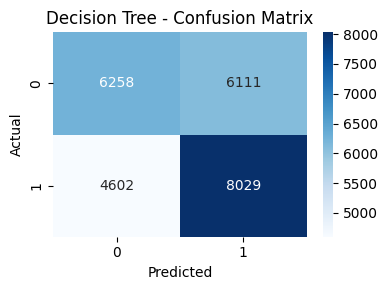

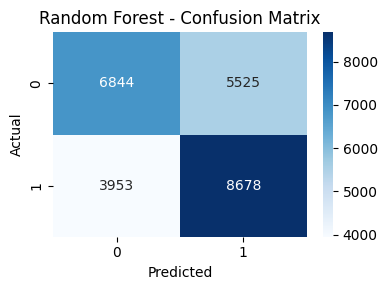

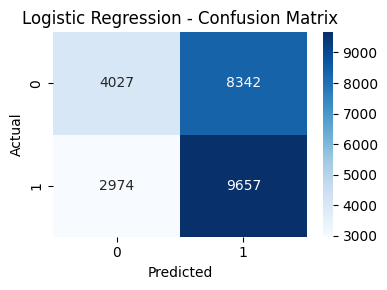

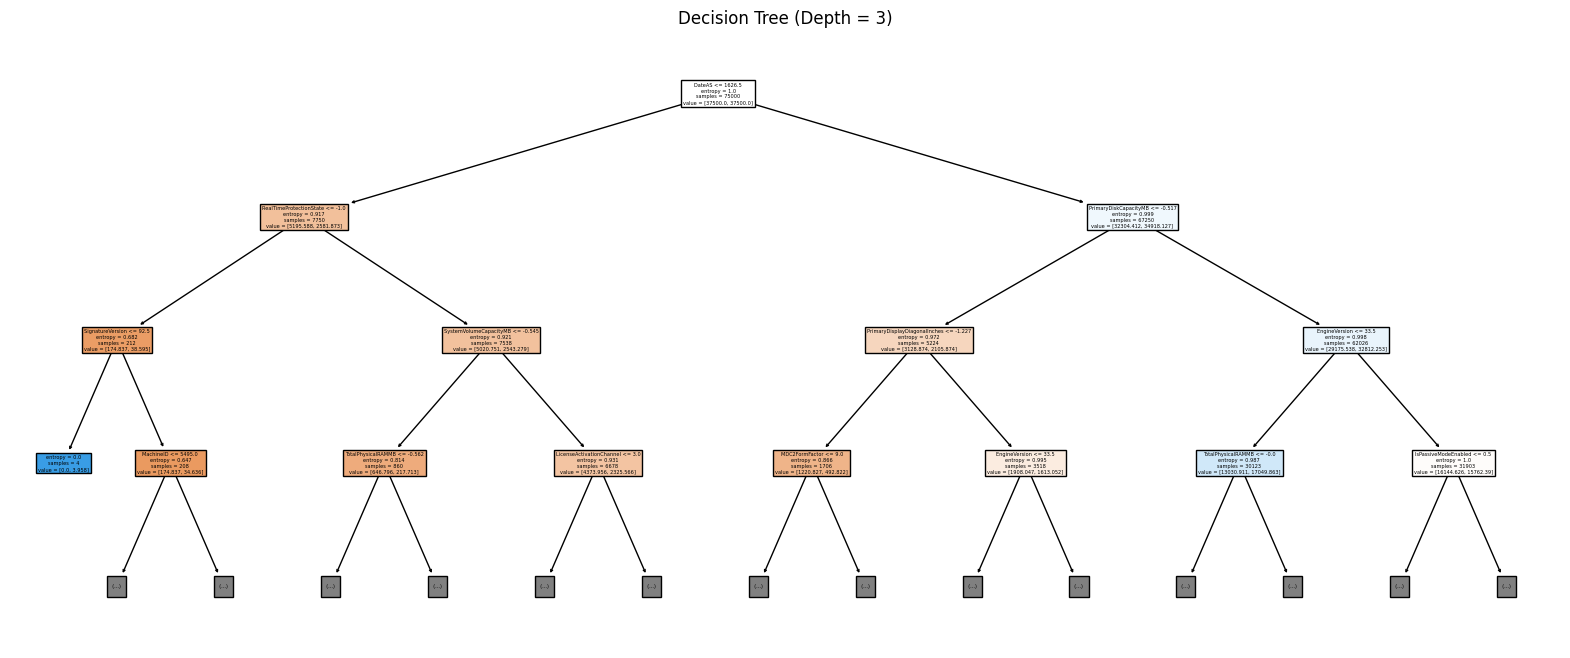


🔹 Top 10 DT Features:
                   Feature  Importance
64                  DateAS    0.077385
6        AntivirusConfigID    0.063678
10                  CityID    0.043641
0                MachineID    0.042041
3         SignatureVersion    0.041851
57       FirmwareVersionID    0.039868
30        ProcessorModelID    0.039595
27              OEMModelID    0.036997
33  SystemVolumeCapacityMB    0.036766
9                CountryID    0.033474


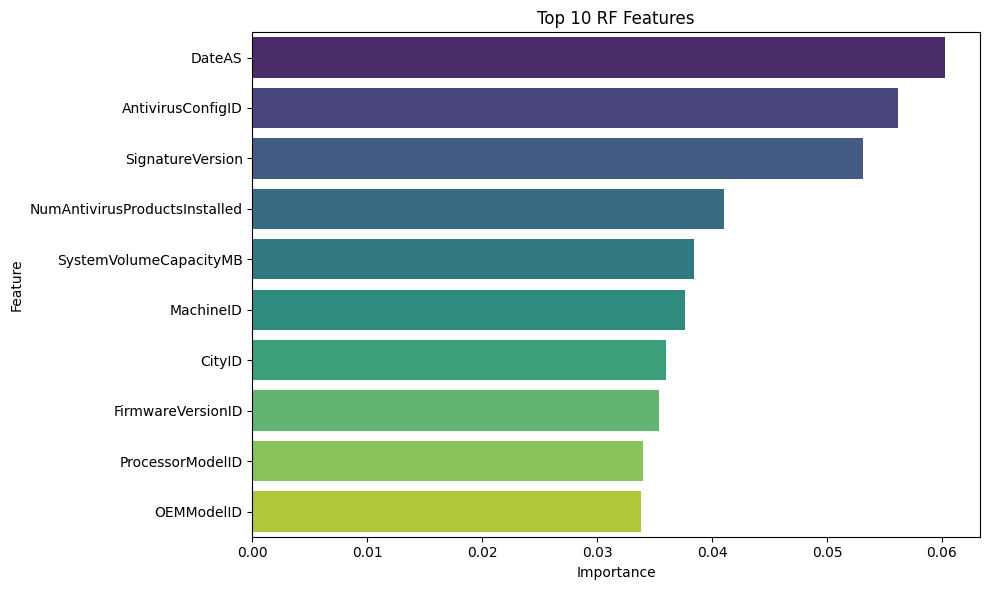

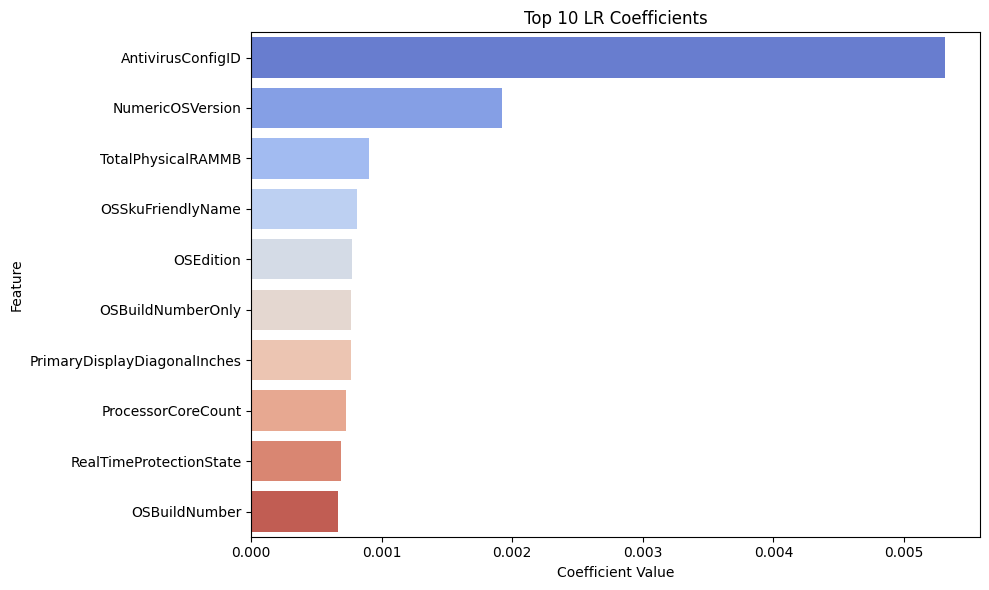

In [9]:

# Decision Tree
decision_tree_model = DecisionTreeClassifier(
    max_depth=18,
    min_samples_split=6,
    min_samples_leaf=2,
    criterion="entropy",
    splitter="best",
    random_state=42,
    max_features="sqrt",
    class_weight="balanced"
)
decision_tree_model.fit(X_train_cleaned, y_train)
dt_val_predictions = decision_tree_model.predict(X_val_cleaned)

# Random Forest
random_forest_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=16,
    min_samples_split=4,
    min_samples_leaf=2,
    max_features="log2",
    bootstrap=True,
    random_state=42,
    class_weight="balanced_subsample"
)
random_forest_model.fit(X_train_cleaned, y_train)
rf_val_predictions = random_forest_model.predict(X_val_cleaned)

# Logistic Regression
logistic_regression_model = LogisticRegression(
    max_iter=1000,
    solver='saga',
    penalty='l2',
    C=0.5,
    class_weight="balanced",
    random_state=42
)
logistic_regression_model.fit(X_train_cleaned, y_train)
lr_val_predictions = logistic_regression_model.predict(X_val_cleaned)

# Evaluation
def evaluate_model(model, X_val, y_val):
    y_pred = model.predict(X_val)
    return {
        'Accuracy': accuracy_score(y_val, y_pred),
        'Precision': precision_score(y_val, y_pred, average='weighted'),
        'Recall': recall_score(y_val, y_pred, average='weighted'),
        'F1 Score': f1_score(y_val, y_pred, average='weighted'),
        'ROC AUC': roc_auc_score(y_val, model.predict_proba(X_val)[:,1])
    }

dt_metrics = evaluate_model(decision_tree_model, X_val_cleaned, y_val)
rf_metrics = evaluate_model(random_forest_model, X_val_cleaned, y_val)
lr_metrics = evaluate_model(logistic_regression_model, X_val_cleaned, y_val)

# Metric Summary Table
metrics_df = pd.DataFrame([dt_metrics, rf_metrics, lr_metrics],
                          index=['Decision Tree', 'Random Forest', 'Logistic Regression'])
print("\n🔹 Model Evaluation Summary:")
print(metrics_df)

# Classification Reports
print("\n🔹 Decision Tree Report:")
print(classification_report(y_val, dt_val_predictions))
print("\n🔹 Random Forest Report:")
print(classification_report(y_val, rf_val_predictions))
print("\n🔹 Logistic Regression Report:")
print(classification_report(y_val, lr_val_predictions))

# Confusion Matrices
models = {
    'Decision Tree': dt_val_predictions,
    'Random Forest': rf_val_predictions,
    'Logistic Regression': lr_val_predictions
}
for name, preds in models.items():
    cm = confusion_matrix(y_val, preds)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

# Decision Tree Plot
plt.figure(figsize=(20, 8))
plot_tree(decision_tree_model, feature_names=X_train_cleaned.columns, filled=True, max_depth=3)
plt.title("Decision Tree (Depth = 3)")
plt.show()

# Feature Importance: Decision Tree
dt_importance = pd.DataFrame({
    'Feature': X_train_cleaned.columns,
    'Importance': decision_tree_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\n🔹 Top 10 DT Features:")
print(dt_importance.head(10))

# Feature Importance: Random Forest
rf_importance = pd.DataFrame({
    'Feature': X_train_cleaned.columns,
    'Importance': random_forest_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=rf_importance['Importance'][:10], y=rf_importance['Feature'][:10], palette='viridis')
plt.title("Top 10 RF Features")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Logistic Regression Coefficients
coefficients = pd.DataFrame({
    'Feature': X_train_cleaned.columns,
    'Coefficient': logistic_regression_model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients['Coefficient'][:10], y=coefficients['Feature'][:10], palette='coolwarm')
plt.title("Top 10 LR Coefficients")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


Submission File

In [10]:
# Function to generate and save submission files
def generate_submission(model, X_test, filename):
    preds = model.predict(X_test)
    submission = pd.DataFrame({
        'id': range(len(preds)),
        'target': preds
    })
    submission.to_csv(filename, index=False)
    print(f" Saved: {filename}")

# Generate submission files
generate_submission(decision_tree_model, X_test_cleaned, "submission_decision_tree.csv")
generate_submission(random_forest_model, X_test_cleaned, "submission_random_forest.csv")

 Saved: submission_decision_tree.csv
 Saved: submission_random_forest.csv


# MILESTONE 2

Linear Model


Best Params - Logistic Regression:
{'C': 0.5, 'penalty': 'l2', 'solver': 'liblinear'}

Classification Report - Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.60      0.55      0.58     12369
         1.0       0.59      0.64      0.62     12631

    accuracy                           0.60     25000
   macro avg       0.60      0.60      0.60     25000
weighted avg       0.60      0.60      0.60     25000


Best Params - Ridge Classifier:
{'alpha': 0.5}

Classification Report - Ridge Classifier:
              precision    recall  f1-score   support

         0.0       0.60      0.55      0.58     12369
         1.0       0.59      0.64      0.62     12631

    accuracy                           0.60     25000
   macro avg       0.60      0.60      0.60     25000
weighted avg       0.60      0.60      0.60     25000



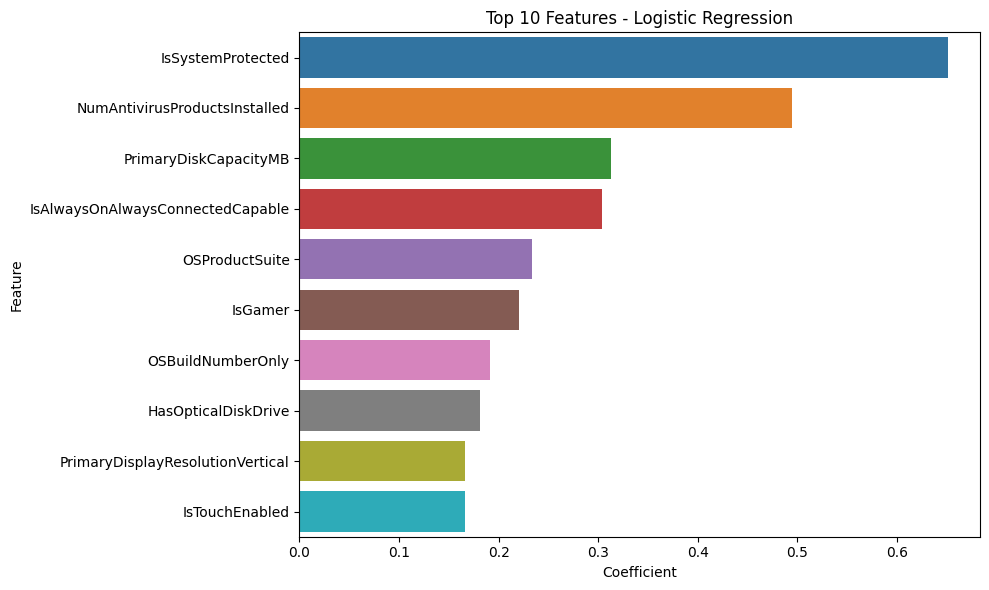

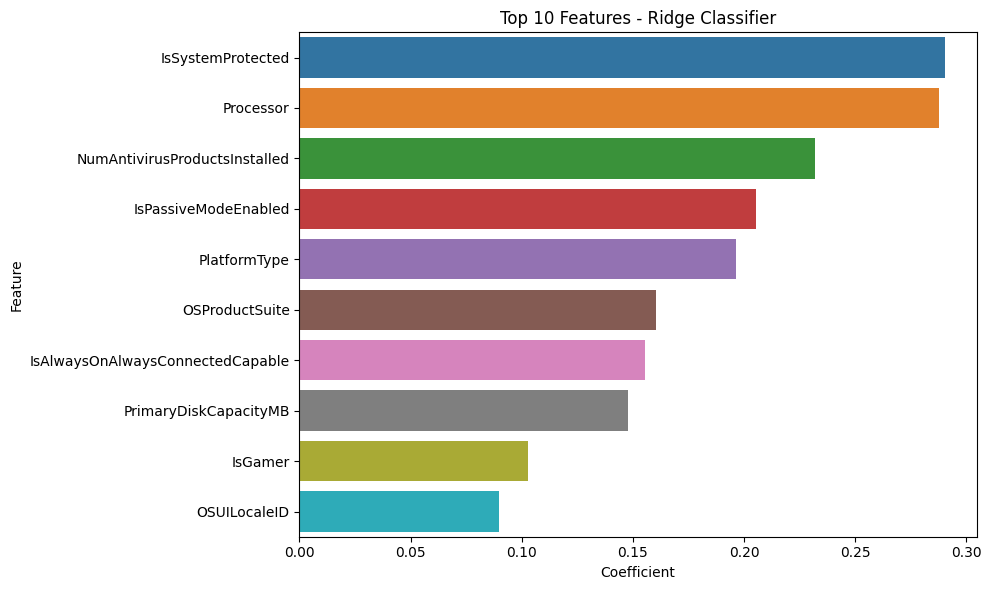


Logistic Regression Metrics:
Accuracy:  0.5964
Precision: 0.5967
Recall:    0.5964
F1 Score:  0.5957

Ridge Classifier Metrics:
Accuracy:  0.5970
Precision: 0.5973
Recall:    0.5970
F1 Score:  0.5963


In [11]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Cross-Validation Strategy
cv_strategy = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Logistic Regression
log_reg_model = LogisticRegression(class_weight='balanced', random_state=42)
log_reg_params = {
    'C': [0.01, 0.1, 0.5],
    'penalty': ['l2'],
    'solver': ['liblinear']
}

log_reg_grid = GridSearchCV(
    estimator=log_reg_model,
    param_grid=log_reg_params,
    cv=cv_strategy,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=0
)

log_reg_grid.fit(X_train_cleaned, y_train)
log_reg_best = log_reg_grid.best_estimator_
log_reg_best.fit(X_train_cleaned, y_train)
log_reg_val_predictions = log_reg_best.predict(X_val_cleaned)

print("\nBest Params - Logistic Regression:")
print(log_reg_grid.best_params_)
print("\nClassification Report - Logistic Regression:")
print(classification_report(y_val, log_reg_val_predictions))

# Ridge Classifier
ridge_model = RidgeClassifier(class_weight='balanced', random_state=42)
ridge_params = {
    'alpha': [0.01, 0.1, 0.5, 1]
}

ridge_grid = GridSearchCV(
    estimator=ridge_model,
    param_grid=ridge_params,
    cv=cv_strategy,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=0
)

ridge_grid.fit(X_train_cleaned, y_train)
ridge_best = ridge_grid.best_estimator_
ridge_best.fit(X_train_cleaned, y_train)
ridge_val_predictions = ridge_best.predict(X_val_cleaned)

print("\nBest Params - Ridge Classifier:")
print(ridge_grid.best_params_)
print("\nClassification Report - Ridge Classifier:")
print(classification_report(y_val, ridge_val_predictions))

# Top Logistic Regression Features
log_reg_coefficients = pd.DataFrame({
    'Feature': X_train_cleaned.columns,
    'Coefficient': abs(log_reg_best.coef_[0])
}).sort_values(by='Coefficient', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=log_reg_coefficients)
plt.title("Top 10 Features - Logistic Regression")
plt.tight_layout()
plt.show()

# Top Ridge Classifier Features
ridge_coefficients = pd.DataFrame({
    'Feature': X_train_cleaned.columns,
    'Coefficient': abs(ridge_best.coef_[0])
}).sort_values(by='Coefficient', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=ridge_coefficients)
plt.title("Top 10 Features - Ridge Classifier")
plt.tight_layout()
plt.show()

# Metric Summary
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Metrics:")
    print(f"Accuracy:  {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"Recall:    {recall_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"F1 Score:  {f1_score(y_true, y_pred, average='weighted'):.4f}")

evaluate_model("Logistic Regression", y_val, log_reg_val_predictions)
evaluate_model("Ridge Classifier", y_val, ridge_val_predictions)


Submission File

In [12]:
# Function to generate and save submission files
def generate_submission(model, X_test, filename):
    preds = model.predict(X_test)
    submission = pd.DataFrame({
        'id': range(len(preds)),
        'target': preds
    })
    submission.to_csv(filename, index=False)
    print(f" Saved: {filename}")
generate_submission(log_reg_best, X_test_cleaned, "submission_logistic_regression.csv")
generate_submission(ridge_best, X_test_cleaned, "submission_ridge_classifier.csv")

 Saved: submission_logistic_regression.csv
 Saved: submission_ridge_classifier.csv


SGD

Fitting 3 folds for each of 16 candidates, totalling 48 fits
🔹 Best Hyperparameters: {'alpha': 0.0001, 'eta0': 0.01, 'learning_rate': 'adaptive', 'loss': 'log_loss', 'penalty': 'l2'}
🔹 Classification Report:
              precision    recall  f1-score   support

         0.0       0.52      0.68      0.59     12369
         1.0       0.55      0.38      0.45     12631

    accuracy                           0.53     25000
   macro avg       0.53      0.53      0.52     25000
weighted avg       0.53      0.53      0.52     25000


🔹 Metrics Summary:
Accuracy : 0.5290
Precision: 0.5336
Recall   : 0.5290
F1 Score : 0.5185
ROC AUC  : 0.532648875439049


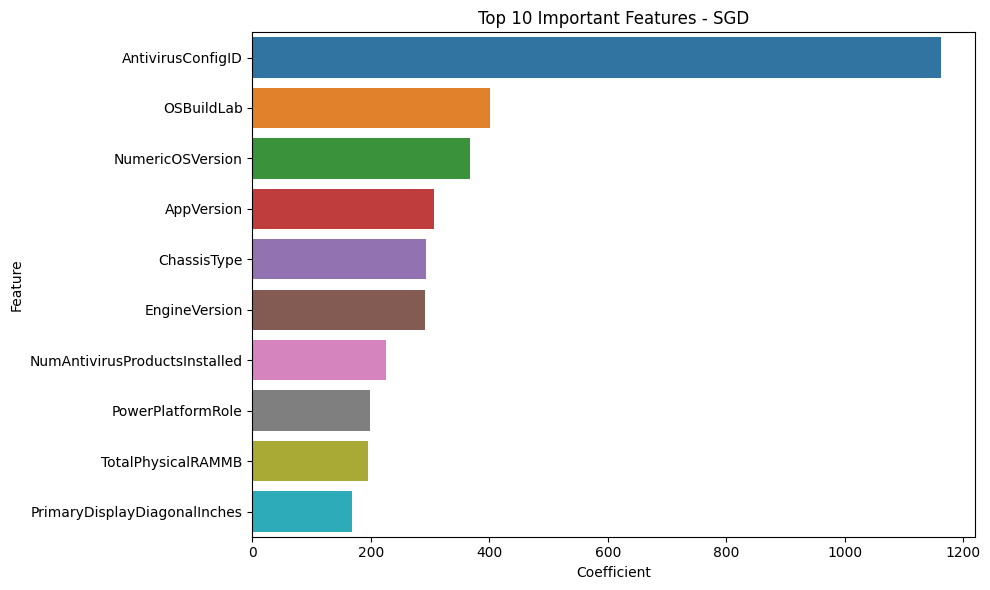

 Submission file saved as: sgd_submission.csv


In [13]:
# Hyperparameter Tuning
sgd = SGDClassifier(class_weight='balanced', random_state=42)
param_grid = {
    'loss': ['hinge', 'log_loss'],
    'penalty': ['l2', 'elasticnet'],
    'alpha': [0.0001, 0.001],
    'learning_rate': ['optimal', 'adaptive'],
    'eta0': [0.01]
}
grid = GridSearchCV(sgd, param_grid, scoring='f1_weighted', cv=3, n_jobs=-1, verbose=1)
grid.fit(X_train_cleaned, y_train)
best_sgd = grid.best_estimator_

# Train on full training data
best_sgd.fit(X_train_cleaned, y_train)
y_pred = best_sgd.predict(X_val_cleaned)

# Evaluation Metrics
print("🔹 Best Hyperparameters:", grid.best_params_)
print("🔹 Classification Report:")
print(classification_report(y_val, y_pred))

accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='weighted')
recall = recall_score(y_val, y_pred, average='weighted')
f1 = f1_score(y_val, y_pred, average='weighted')

try:
    y_proba = best_sgd.predict_proba(X_val_cleaned)[:, 1]
    roc_auc = roc_auc_score(y_val, y_proba)
except:
    roc_auc = "N/A"

print(f"\n🔹 Metrics Summary:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")
print(f"ROC AUC  : {roc_auc}")

# Feature Importance
coeffs = pd.DataFrame({
    'Feature': X_train_cleaned.columns,
    'Coefficient': abs(best_sgd.coef_[0])
}).sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coeffs.head(10))
plt.title("Top 10 Important Features - SGD")
plt.tight_layout()
plt.show()

# Submission File
sgd_test_preds = best_sgd.predict(X_test_cleaned)
submission = pd.DataFrame({
    'id': range(len(sgd_test_preds)),
    'target': sgd_test_preds
})
submission.to_csv('sgd_submission.csv', index=False)
print(" Submission file saved as: sgd_submission.csv")

# MILESTONE 3

Random Forest Model

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 20, 'min_samples_leaf': 5, 'max_features': 'log2', 'max_depth': None}

Classification Report:
               precision    recall  f1-score   support

         0.0       0.61      0.60      0.61     12369
         1.0       0.62      0.63      0.62     12631

    accuracy                           0.62     25000
   macro avg       0.62      0.62      0.62     25000
weighted avg       0.62      0.62      0.62     25000


Metrics Summary:
Accuracy : 0.6166
Precision: 0.6165
Recall   : 0.6166
F1 Score : 0.6165
ROC AUC  : 0.6641453433487182


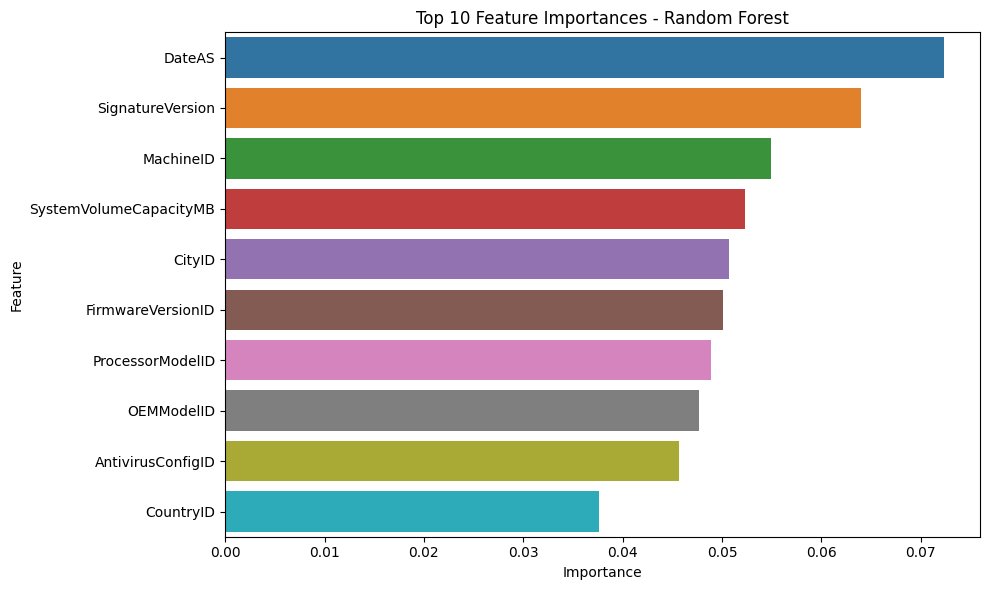

Submission file saved as: random_forest_milestone3.csv


In [14]:
X_sample, _, y_sample, _ = train_test_split(
    X_train_cleaned, y_train, train_size=0.4, stratify=y_train, random_state=42
)

# Base model for feature selection
base_rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
base_rf.fit(X_sample, y_sample)

# Select top features based on median importance
selector = SelectFromModel(base_rf, threshold="median", prefit=True)

# Transform datasets
X_train_sel = selector.transform(X_train_cleaned)
X_val_sel = selector.transform(X_val_cleaned)
X_test_sel = selector.transform(X_test_cleaned)

# Hyperparameter space
param_dist = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [5, 10, 20],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2']
}

# Tune on 40% sampled data
rf = RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=-1)
search = RandomizedSearchCV(
    rf, param_distributions=param_dist, n_iter=20, cv=3, scoring='f1_weighted',
    random_state=42, n_jobs=-1, verbose=1
)
search.fit(selector.transform(X_sample), y_sample)

# Final model on full selected data
best_rf = search.best_estimator_
best_rf.fit(X_train_sel, y_train)
y_pred = best_rf.predict(X_val_sel)

# Evaluation
print("Best Hyperparameters:", search.best_params_)
print("\nClassification Report:\n", classification_report(y_val, y_pred))

acc = accuracy_score(y_val, y_pred)
prec = precision_score(y_val, y_pred, average='weighted')
rec = recall_score(y_val, y_pred, average='weighted')
f1 = f1_score(y_val, y_pred, average='weighted')

try:
    y_proba = best_rf.predict_proba(X_val_sel)[:, 1]
    roc_auc = roc_auc_score(y_val, y_proba)
except:
    roc_auc = "N/A"

print("\nMetrics Summary:")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1 Score : {f1:.4f}")
print(f"ROC AUC  : {roc_auc}")

# Top 10 feature importances
feature_mask = selector.get_support()
selected_features = X_train_cleaned.columns[feature_mask]
importances = pd.DataFrame({
    'Feature': selected_features,
    'Importance': best_rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances.head(10))
plt.title("Top 10 Feature Importances - Random Forest")
plt.tight_layout()
plt.show()

# Submission
rf_test_preds = best_rf.predict(X_test_sel)
submission = pd.DataFrame({'id': range(len(rf_test_preds)), 'target': rf_test_preds})
submission.to_csv('random_forest_milestone3.csv', index=False)
print("Submission file saved as: random_forest_milestone3.csv")

Naive Bayes

In [15]:
# Define model and parameter grid
nb_model = GaussianNB()
nb_params = {'var_smoothing': [1e-9, 1e-8, 1e-7]}

# Grid search with 3-fold cross-validation
nb_grid = GridSearchCV(nb_model, nb_params, scoring='accuracy', cv=3, n_jobs=-1, verbose=1)
nb_grid.fit(X_train_cleaned, y_train)

# Fit best model
best_nb = nb_grid.best_estimator_
best_nb.fit(X_train_cleaned, y_train)

# Predict on validation set
nb_preds = best_nb.predict(X_val_cleaned)

# Print best parameters and classification report
print("Best Parameters:", nb_grid.best_params_)
print("\nClassification Report:\n", classification_report(y_val, nb_preds))

# Evaluation metrics
acc = accuracy_score(y_val, nb_preds)
prec = precision_score(y_val, nb_preds, average='weighted')
rec = recall_score(y_val, nb_preds, average='weighted')
f1 = f1_score(y_val, nb_preds, average='weighted')

# ROC AUC (check if predict_proba is available)
try:
    roc_auc = roc_auc_score(y_val, best_nb.predict_proba(X_val_cleaned)[:, 1])
except:
    roc_auc = "Not available"

# Print evaluation scores
print(f"\nAccuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc}")

# Generate submission file
nb_test_preds = best_nb.predict(X_test_cleaned)
submission = pd.DataFrame({'id': range(len(nb_test_preds)), 'target': nb_test_preds})
submission.to_csv('naive_bayes.csv', index=False)
print("Submission file saved as: naive_bayes.csv")

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best Parameters: {'var_smoothing': 1e-09}

Classification Report:
               precision    recall  f1-score   support

         0.0       0.62      0.33      0.43     12369
         1.0       0.55      0.80      0.65     12631

    accuracy                           0.57     25000
   macro avg       0.58      0.57      0.54     25000
weighted avg       0.58      0.57      0.54     25000


Accuracy: 0.5680
Precision: 0.5844
Recall: 0.5680
F1 Score: 0.5419
ROC AUC: 0.6131496464709317
Submission file saved as: naive_bayes.csv


KNN

In [16]:
X_tune, _, y_tune, _ = train_test_split(X_train_cleaned, y_train, train_size=0.4, stratify=y_train, random_state=42)

param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['kd_tree'],
    'metric': ['euclidean', 'manhattan']
}

knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=5, scoring='f1_weighted', n_jobs=-1, verbose=1)
grid.fit(X_tune, y_tune)
best_knn = grid.best_estimator_

best_knn.fit(X_train_cleaned, y_train)
y_pred = best_knn.predict(X_val_cleaned)

print("Best Hyperparameters:", grid.best_params_)
print("\nClassification Report:\n", classification_report(y_val, y_pred))
print("\nMetrics Summary:")
print(f"Accuracy : {accuracy_score(y_val, y_pred):.4f}")
print(f"Precision: {precision_score(y_val, y_pred, average='weighted'):.4f}")
print(f"Recall   : {recall_score(y_val, y_pred, average='weighted'):.4f}")
print(f"F1 Score : {f1_score(y_val, y_pred, average='weighted'):.4f}")

knn_test_preds = best_knn.predict(X_test_cleaned)
submission = pd.DataFrame({'id': range(len(knn_test_preds)), 'target': knn_test_preds})
submission.to_csv('knn_submission.csv', index=False)
print("Submission file saved as: knn_submission.csv")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Hyperparameters: {'algorithm': 'kd_tree', 'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}

Classification Report:
               precision    recall  f1-score   support

         0.0       0.52      0.41      0.46     12369
         1.0       0.52      0.63      0.57     12631

    accuracy                           0.52     25000
   macro avg       0.52      0.52      0.51     25000
weighted avg       0.52      0.52      0.51     25000


Metrics Summary:
Accuracy : 0.5204
Precision: 0.5202
Recall   : 0.5204
F1 Score : 0.5146
Submission file saved as: knn_submission.csv


LIGHTGBM

In [17]:
X_lgb_small, _, y_lgb_small, _ = train_test_split(X_train_cleaned, y_train, train_size=0.5, random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'min_child_samples': [5, 10, 20],
    'reg_alpha': np.linspace(0, 1, 4),
    'reg_lambda': np.linspace(0, 1, 4)
}

lgb_model = LGBMClassifier(random_state=42)

search = RandomizedSearchCV(
    lgb_model,
    param_distributions=param_grid,
    n_iter=40,
    scoring='f1_weighted',
    cv=3,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

search.fit(X_lgb_small, y_lgb_small)

best_lgb = search.best_estimator_
best_lgb.fit(X_train_cleaned, y_train)

val_preds = best_lgb.predict(X_val_cleaned)
print("Best Hyperparameters:", search.best_params_)
print("Validation Performance:\n", classification_report(y_val, val_preds))

# Generate submission
test_preds = best_lgb.predict(X_test_cleaned)
submission = pd.DataFrame({'id': range(len(test_preds)), 'target': test_preds})
submission.to_csv('lightgbm_submission.csv', index=False)
print("Saved: lightgbm_submission.csv")


Fitting 3 folds for each of 40 candidates, totalling 120 fits
[LightGBM] [Info] Number of positive: 18912, number of negative: 18588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008281 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4906
[LightGBM] [Info] Number of data points in the train set: 37500, number of used features: 66
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.504320 -> initscore=0.017280
[LightGBM] [Info] Start training from score 0.017280
[LightGBM] [Info] Number of positive: 37894, number of negative: 37106
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012371 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5069
[LightGBM] [Info] Number of data points in the trai

SVM

In [18]:
X_half, _, y_half, _ = train_test_split(X_train_cleaned, y_train, train_size=0.5, stratify=y_train, random_state=42)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('linearsvc', LinearSVC(dual=False, random_state=42))
])

param_grid = {
    'linearsvc__C': [0.01, 0.1, 1, 10, 50],
    'linearsvc__max_iter': [1000, 2000, 3000, 5000]
}

search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_grid,
    n_iter=15,
    scoring='f1_weighted',
    cv=3,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

search.fit(X_half, y_half)

svm_best = search.best_estimator_
svm_best.fit(X_train_cleaned, y_train)

val_preds = svm_best.predict(X_val_cleaned)

print("Best Hyperparameters:", search.best_params_)
print("\nClassification Report:\n", classification_report(y_val, val_preds))

acc = accuracy_score(y_val, val_preds)
prec = precision_score(y_val, val_preds, average='weighted')
rec = recall_score(y_val, val_preds, average='weighted')
f1 = f1_score(y_val, val_preds, average='weighted')

print("\nMetrics Summary:")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1 Score : {f1:.4f}")

test_preds = svm_best.predict(X_test_cleaned)
submission = pd.DataFrame({'id': range(len(test_preds)), 'target': test_preds})
submission.to_csv('svm_submission.csv', index=False)
print("Submission file saved as: svm_submission.csv")

Fitting 3 folds for each of 15 candidates, totalling 45 fits
Best Hyperparameters: {'linearsvc__max_iter': 1000, 'linearsvc__C': 1}

Classification Report:
               precision    recall  f1-score   support

         0.0       0.60      0.54      0.57     12369
         1.0       0.59      0.66      0.62     12631

    accuracy                           0.60     25000
   macro avg       0.60      0.60      0.60     25000
weighted avg       0.60      0.60      0.60     25000


Metrics Summary:
Accuracy : 0.5972
Precision: 0.5979
Recall   : 0.5972
F1 Score : 0.5956
Submission file saved as: svm_submission.csv


PCA & Feature Selection

In [19]:
# PCA + Scaling
pca_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.98, svd_solver='full'))
])
X_train_pca = pca_pipe.fit_transform(X_train_cleaned)
X_val_pca = pca_pipe.transform(X_val_cleaned)
X_test_pca = pca_pipe.transform(X_test_cleaned)

# Feature selection
selector = SelectKBest(f_classif, k=min(10, X_train_pca.shape[1]))
X_train_sel = selector.fit_transform(X_train_pca, y_train)
X_val_sel = selector.transform(X_val_pca)
X_test_sel = selector.transform(X_test_pca)

# Store results
results = []

def evaluate_model(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return acc, prec, rec, f1

def train_eval_save(name, model):
    model.fit(X_train_sel, y_train)
    preds = model.predict(X_val_sel)
    acc, prec, rec, f1 = evaluate_model(y_val, preds)
    results.append({'Model': name, 'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1': f1})
    print(f"\n🔹 {name} PCA:")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1-Score:  {f1:.4f}")
    print(classification_report(y_val, preds, digits=4))
    test_preds = model.predict(X_test_sel)
    pd.DataFrame({'id': range(len(test_preds)), 'target': test_preds}).to_csv(f'{name}_PCA_model.csv', index=False)

# Models
train_eval_save("LogReg", LogisticRegression(C=0.01, penalty='l2', solver='liblinear', class_weight='balanced', random_state=42))
train_eval_save("Ridge", RidgeClassifier(alpha=1, class_weight='balanced', random_state=42))
train_eval_save("XGBoost", XGBClassifier(n_estimators=300, learning_rate=0.1, max_depth=5, eval_metric='logloss', n_jobs=-1, random_state=42))
train_eval_save("LightGBM", LGBMClassifier(n_estimators=300, learning_rate=0.1, max_depth=5, n_jobs=-1, random_state=42))
train_eval_save("CatBoost", CatBoostClassifier(n_estimators=300, learning_rate=0.1, depth=5, verbose=0, random_state=42))
train_eval_save("RandomForest", RandomForestClassifier(n_estimators=200, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_jobs=-1, random_state=42))
train_eval_save("Bagging", BaggingClassifier(estimator=LogisticRegression(solver='saga', max_iter=200), n_estimators=30, n_jobs=-1, random_state=42))
train_eval_save("NaiveBayes", GaussianNB(var_smoothing=1e-9))
train_eval_save("KNN", KNeighborsClassifier(n_neighbors=5, n_jobs=-1))
train_eval_save("MLP", MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=300, random_state=42))

stack_model = StackingClassifier(
    estimators=[
        ('xgb', XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=5, eval_metric='logloss', random_state=42, n_jobs=-1)),
        ('lgbm', LGBMClassifier(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42, n_jobs=-1)),
        ('rf', RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1))
    ],
    final_estimator=LogisticRegression(max_iter=200),
    n_jobs=-1
)
train_eval_save("Stacking", stack_model)


df_results = pd.DataFrame(results)
df_sorted = df_results.sort_values(by=['F1', 'Accuracy'], ascending=False)
print("\n Model Sorted (sorted by F1 Score):")
print(df_sorted.to_string(index=False))



🔹 LogReg PCA:
Accuracy:  0.5899
Precision: 0.5848
Recall:    0.6494
F1-Score:  0.6154
              precision    recall  f1-score   support

         0.0     0.5964    0.5291    0.5607     12369
         1.0     0.5848    0.6494    0.6154     12631

    accuracy                         0.5899     25000
   macro avg     0.5906    0.5892    0.5881     25000
weighted avg     0.5905    0.5899    0.5884     25000


🔹 Ridge PCA:
Accuracy:  0.5906
Precision: 0.5848
Recall:    0.6538
F1-Score:  0.6174
              precision    recall  f1-score   support

         0.0     0.5981    0.5261    0.5598     12369
         1.0     0.5848    0.6538    0.6174     12631

    accuracy                         0.5906     25000
   macro avg     0.5915    0.5899    0.5886     25000
weighted avg     0.5914    0.5906    0.5889     25000


🔹 XGBoost PCA:
Accuracy:  0.5967
Precision: 0.5926
Recall:    0.6458
F1-Score:  0.6180
              precision    recall  f1-score   support

         0.0     0.6018    0.5

## MILESTONE 4

BOOSTING

XgBoost

In [20]:
xgb_model = XGBClassifier(
    n_estimators=600,
    learning_rate=0.03,
    max_depth=8,
    subsample=0.85,
    colsample_bytree=0.85,
    gamma=0.1,
    min_child_weight=2,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1
)

xgb_model.fit(X_train_cleaned, y_train)
xgb_val_pred = xgb_model.predict(X_val_cleaned)
xgb_val_prob = xgb_model.predict_proba(X_val_cleaned)[:, 1]

print("XGBoost Model Performance:")
print(classification_report(y_val, xgb_val_pred, digits=4))

accuracy = accuracy_score(y_val, xgb_val_pred)
f1 = f1_score(y_val, xgb_val_pred)
precision = precision_score(y_val, xgb_val_pred)
recall = recall_score(y_val, xgb_val_pred)
roc_auc = roc_auc_score(y_val, xgb_val_prob)

print(f"Accuracy:   {accuracy:.4f}")
print(f"F1 Score:   {f1:.4f}")
print(f"Precision:  {precision:.4f}")
print(f"Recall:     {recall:.4f}")
print(f"ROC-AUC:    {roc_auc:.4f}")

xgb_test_pred = xgb_model.predict(X_test_cleaned)
pd.DataFrame({'id': range(len(xgb_test_pred)), 'target': xgb_test_pred}).to_csv('XGBoost_submission.csv', index=False)

XGBoost Model Performance:
              precision    recall  f1-score   support

         0.0     0.6174    0.6600    0.6380     12369
         1.0     0.6429    0.5996    0.6205     12631

    accuracy                         0.6294     25000
   macro avg     0.6302    0.6298    0.6292     25000
weighted avg     0.6303    0.6294    0.6291     25000

Accuracy:   0.6294
F1 Score:   0.6205
Precision:  0.6429
Recall:     0.5996
ROC-AUC:    0.6800


GBoost


In [21]:
X_gbm_small, _, y_gbm_small, _ = train_test_split(
    X_train_cleaned, y_train, train_size=0.25, stratify=y_train, random_state=42
)

# Hyperparameters
params = {
    'n_estimators': [100, 200], 
    'learning_rate': [0.05, 0.1], 
    'max_depth': [5, 6],
    'subsample': [0.8, 1.0],
    'min_samples_split': [2, 5]
}

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Randomized Search
search = RandomizedSearchCV(
    GradientBoostingClassifier(random_state=42),
    param_distributions=params,
    n_iter=3, 
    scoring='f1_weighted',
    cv=cv,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Fit the model
search.fit(X_gbm_small, y_gbm_small)

# Best Model
best_gbm = search.best_estimator_
best_gbm.fit(X_train_cleaned, y_train)

# Validation
val_preds = best_gbm.predict(X_val_cleaned)
val_probs = best_gbm.predict_proba(X_val_cleaned)[:, 1]
print("Best Params:", search.best_params_)
print("Validation Report:\n", classification_report(y_val, val_preds, digits=4))
print("ROC-AUC:", round(roc_auc_score(y_val, val_probs), 4))

# Test Predictions
test_preds = best_gbm.predict(X_test_cleaned)
submission = pd.DataFrame({'id': range(len(test_preds)), 'target': test_preds})
submission.to_csv('gbm_submission.csv', index=False)
print("Saved: gbm_submission.csv")

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best Params: {'subsample': 1.0, 'n_estimators': 100, 'min_samples_split': 5, 'max_depth': 6, 'learning_rate': 0.1}
Validation Report:
               precision    recall  f1-score   support

         0.0     0.6269    0.5980    0.6121     12369
         1.0     0.6233    0.6514    0.6371     12631

    accuracy                         0.6250     25000
   macro avg     0.6251    0.6247    0.6246     25000
weighted avg     0.6251    0.6250    0.6247     25000

ROC-AUC: 0.6738
Saved: gbm_submission.csv


CatBoost

In [22]:
cat_model = CatBoostClassifier(iterations=300, learning_rate=0.1, depth=5, verbose=0, random_seed=42)
cat_model.fit(X_train_cleaned, y_train)
cat_val_pred = cat_model.predict(X_val_cleaned)
cat_val_prob = cat_model.predict_proba(X_val_cleaned)[:, 1]

print("CatBoost Classification Report:\n", classification_report(y_val, cat_val_pred, digits=4))
print("CatBoost ROC-AUC:", round(roc_auc_score(y_val, cat_val_prob), 4))

cat_test_pred = cat_model.predict(X_test_cleaned)
pd.DataFrame({'id': range(len(cat_test_pred)), 'target': cat_test_pred}).to_csv('catboost_submission.csv', index=False)
print("Saved: catboost_submission.csv")


CatBoost Classification Report:
               precision    recall  f1-score   support

         0.0     0.6311    0.5989    0.6146     12369
         1.0     0.6259    0.6572    0.6412     12631

    accuracy                         0.6284     25000
   macro avg     0.6285    0.6281    0.6279     25000
weighted avg     0.6285    0.6284    0.6280     25000

CatBoost ROC-AUC: 0.6791
Saved: catboost_submission.csv


Neural Network (MLP)

In [23]:
mlp_model = MLPClassifier(hidden_layer_sizes=(150, 75), activation='relu', solver='adam', max_iter=300, random_state=42)
mlp_model.fit(X_train_cleaned, y_train)
mlp_val_pred = mlp_model.predict(X_val_cleaned)
mlp_val_prob = mlp_model.predict_proba(X_val_cleaned)[:, 1]

print("\nMLP Classification Report:\n", classification_report(y_val, mlp_val_pred, digits=4))
print("MLP ROC-AUC:", round(roc_auc_score(y_val, mlp_val_prob), 4))

mlp_test_pred = mlp_model.predict(X_test_cleaned)
pd.DataFrame({'id': range(len(mlp_test_pred)), 'target': mlp_test_pred}).to_csv('mlp_submission.csv', index=False)
print("Saved: mlp_submission.csv")


MLP Classification Report:
               precision    recall  f1-score   support

         0.0     0.6708    0.1186    0.2016     12369
         1.0     0.5221    0.9430    0.6721     12631

    accuracy                         0.5351     25000
   macro avg     0.5964    0.5308    0.4368     25000
weighted avg     0.5957    0.5351    0.4393     25000

MLP ROC-AUC: 0.531
Saved: mlp_submission.csv


Pipeline of Models

In [24]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=50, random_state=42)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

param_grid = {
    'xgb__n_estimators': [200, 500],
    'xgb__learning_rate': [0.05, 0.1, 0.2],
    'xgb__max_depth': [3, 6, 9],
    'xgb__subsample': [0.8, 1.0],
    'xgb__colsample_bytree': [0.8, 1.0]
}

search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_grid,
    n_iter=10,
    cv=3,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

search.fit(X_train_cleaned, y_train)

best_pipeline = search.best_estimator_
val_preds = best_pipeline.predict(X_val_cleaned)
val_probs = best_pipeline.predict_proba(X_val_cleaned)[:, 1]

print("Best Hyperparameters:", search.best_params_)
print("Validation Classification Report:\n", classification_report(y_val, val_preds, digits=4))
print("ROC-AUC Score:", round(roc_auc_score(y_val, val_probs), 4))

test_preds = best_pipeline.predict(X_test_cleaned)
submission = pd.DataFrame({'id': range(len(test_preds)), 'target': test_preds})
submission.to_csv('pca_xgboost_submission.csv', index=False)
print("Saved: pca_xgboost_submission.csv")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Hyperparameters: {'xgb__subsample': 0.8, 'xgb__n_estimators': 200, 'xgb__max_depth': 6, 'xgb__learning_rate': 0.05, 'xgb__colsample_bytree': 0.8}
Validation Classification Report:
               precision    recall  f1-score   support

         0.0     0.6132    0.5802    0.5962     12369
         1.0     0.6095    0.6417    0.6252     12631

    accuracy                         0.6112     25000
   macro avg     0.6114    0.6109    0.6107     25000
weighted avg     0.6113    0.6112    0.6109     25000

ROC-AUC Score: 0.6528
Saved: pca_xgboost_submission.csv


Bagging

In [25]:
bagging_model = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=100, 
    n_jobs=-1, 
    random_state=42
)
bagging_model.fit(X_train_cleaned, y_train)

bagging_val_pred = bagging_model.predict(X_val_cleaned)
print("Bagging Model Report:\n", classification_report(y_val, bagging_val_pred, digits=4))

test_pred = bagging_model.predict(X_test_cleaned)
submission = pd.DataFrame({'id': range(len(test_pred)), 'target': test_pred})
submission.to_csv('bagging_submission.csv', index=False)
print("Saved: bagging_submission.csv")

Bagging Model Report:
               precision    recall  f1-score   support

         0.0     0.5862    0.6118    0.5987     12369
         1.0     0.6029    0.5772    0.5897     12631

    accuracy                         0.5943     25000
   macro avg     0.5946    0.5945    0.5942     25000
weighted avg     0.5946    0.5943    0.5942     25000

Saved: bagging_submission.csv


 Stacking

In [26]:
base_models = [
    ('sgd', SGDClassifier(loss='hinge', alpha=0.001, max_iter=500, random_state=42, n_jobs=-1)),
    ('knn', KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree', leaf_size=25, metric='minkowski', weights='uniform', n_jobs=-1)),
    ('rf', RandomForestClassifier(n_estimators=30, max_depth=7, n_jobs=-1, random_state=42))
]

stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=RidgeClassifier(alpha=1.0, random_state=42),
    n_jobs=-1
)

stacking_model.fit(X_train_cleaned, y_train)
stacking_val_pred = stacking_model.predict(X_val_cleaned)
print("Stacking Model Report:\n", classification_report(y_val, stacking_val_pred, digits=4))


test_pred = stacking_model.predict(X_test_cleaned)
submission = pd.DataFrame({'id': range(len(test_pred)), 'target': test_pred})
submission.to_csv('stacking_submission.csv', index=False)
print("Saved: stacking_submission.csv")

Stacking Model Report:
               precision    recall  f1-score   support

         0.0     0.6246    0.5246    0.5703     12369
         1.0     0.5976    0.6912    0.6410     12631

    accuracy                         0.6088     25000
   macro avg     0.6111    0.6079    0.6056     25000
weighted avg     0.6109    0.6088    0.6060     25000

Saved: stacking_submission.csv


ExtraTreesClassifier

In [27]:
et_model = ExtraTreesClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)
et_model.fit(X_train_cleaned, y_train)

val_pred = et_model.predict(X_val_cleaned)
val_prob = et_model.predict_proba(X_val_cleaned)[:, 1]

print("Extra Trees Report:\n", classification_report(y_val, val_pred, digits=4))
print("ROC-AUC:", round(roc_auc_score(y_val, val_prob), 4))

test_pred = et_model.predict(X_test_cleaned)
submission = pd.DataFrame({'id': range(len(test_pred)), 'target': test_pred})
submission.to_csv('extra_trees_submission.csv', index=False)
print("Saved: extra_trees_submission.csv")

Extra Trees Report:
               precision    recall  f1-score   support

         0.0     0.6202    0.5833    0.6012     12369
         1.0     0.6144    0.6501    0.6318     12631

    accuracy                         0.6171     25000
   macro avg     0.6173    0.6167    0.6165     25000
weighted avg     0.6172    0.6171    0.6166     25000

ROC-AUC: 0.6628
Saved: extra_trees_submission.csv


XGBoost + Stacking Model

In [28]:
X_train_array = X_train_cleaned.values
X_val_array = X_val_cleaned.values

# Feature selection with XGBoost
base_xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, 
                         use_label_encoder=False, eval_metric='logloss', random_state=42)
base_xgb.fit(X_train_array, y_train)
selector = SelectFromModel(base_xgb, threshold='mean', prefit=True)
X_train_selected = selector.transform(X_train_array)
X_val_selected = selector.transform(X_val_array)

# Hyperparameter tuning
param_dist = {
    'n_estimators': [300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.7, 1.0],
    'gamma': [0, 0.1]
}
tuned_xgb = RandomizedSearchCV(
    XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    param_distributions=param_dist,
    n_iter=10,
    scoring='accuracy',
    cv=3,
    verbose=1,
    n_jobs=-1
)
tuned_xgb.fit(X_train_selected, y_train)
best_xgb = tuned_xgb.best_estimator_

# Stacking ensemble
stacking_clf = StackingClassifier(
    estimators=[('xgb', best_xgb), ('lr', LogisticRegression(max_iter=1000))],
    final_estimator=LogisticRegression(max_iter=1000)
)
stacking_clf.fit(X_train_selected, y_train)

# Prediction and evaluation
xgb_val_pred = stacking_clf.predict(X_val_selected)
print("\n🔹 Optimized XGBoost + Stacking Model Performance:")
print(classification_report(y_val, xgb_val_pred))

Fitting 3 folds for each of 10 candidates, totalling 30 fits

🔹 Optimized XGBoost + Stacking Model Performance:
              precision    recall  f1-score   support

         0.0       0.63      0.57      0.60     12369
         1.0       0.62      0.67      0.64     12631

    accuracy                           0.62     25000
   macro avg       0.62      0.62      0.62     25000
weighted avg       0.62      0.62      0.62     25000



XGBoost Tuned

In [29]:
param_grid = {
    'n_estimators': [200, 300, 400],
    'learning_rate': [0.05, 0.1],
    'max_depth': [5, 7, 9],
    'min_child_weight': [1, 3],
    'gamma': [0, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_lambda': [1, 10],
    'reg_alpha': [0, 1],
    'scale_pos_weight': [1, 3]
}

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=30,
    scoring='f1_weighted',
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

search.fit(X_train_cleaned, y_train)

best_xgb = search.best_estimator_
val_preds = best_xgb.predict(X_val_cleaned)
val_probs = best_xgb.predict_proba(X_val_cleaned)[:, 1]

print("Best Hyperparameters:", search.best_params_)
print("Validation Classification Report:\n", classification_report(y_val, val_preds, digits=4))
print("ROC-AUC Score:", round(roc_auc_score(y_val, val_probs), 4))

test_preds = best_xgb.predict(X_test_cleaned)
submission = pd.DataFrame({'id': range(len(test_preds)), 'target': test_preds})
submission.to_csv('fine_tuned_xgboost_submission.csv', index=False)
print("Saved: fine_tuned_xgboost_submission.csv")


Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best Hyperparameters: {'subsample': 0.8, 'scale_pos_weight': 1, 'reg_lambda': 10, 'reg_alpha': 1, 'n_estimators': 400, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.8}
Validation Classification Report:
               precision    recall  f1-score   support

         0.0     0.6261    0.6238    0.6250     12369
         1.0     0.6330    0.6353    0.6341     12631

    accuracy                         0.6296     25000
   macro avg     0.6296    0.6295    0.6295     25000
weighted avg     0.6296    0.6296    0.6296     25000

ROC-AUC Score: 0.6805
Saved: fine_tuned_xgboost_submission.csv


## MILESTONE 5

## Model Evaluation Results



### Based on Accuracy 

| Model Name             | Accuracy | Precision | Recall   | F1 Score | ROC AUC  |
|-------------------------|----------|-----------|----------|----------|----------|
| Fine-Tuned XGBoost      | 0.6296   | 0.6296    | 0.6296   | 0.6296   | 0.6805   |
| Optimized XGBoost       | 0.6294   | 0.6429    | 0.5996   | 0.6205   | 0.6800   |
| CatBoost                | 0.6284   | 0.6259    | 0.6572   | 0.6412   | 0.6791   |
| GBM (Gradient Boosting) | 0.6250   | 0.6233    | 0.6514   | 0.6371   | 0.6738   |
| Random Forest           | 0.62088  | 0.622319  | 0.62088  | 0.619122  | 0.670297 |
| Extra Trees             | 0.6171   | 0.6144    | 0.6501   | 0.6318   | 0.6628   |
| XGBoost PCA             | 0.6112   | 0.6095    | 0.6417   | 0.6252   | 0.6528   |
| Stacking                | 0.6088   | 0.5976    | 0.6912   | 0.6410   | -        |
| Optimized XGBoost + Stacking | 0.62   | 0.61      | 0.68     | 0.65     | -        |
| SVM                     | 0.5972   | 0.5979    | 0.5972   | 0.5956   | -        |
| Ridge Classifier        | 0.5970   | 0.5973    | 0.5970   | 0.5963   | -        |
| Logistic Regression     | 0.5964   | 0.5967    | 0.5964   | 0.5957   | -        |
| LightGBM PCA            | 0.5953   | 0.5916    | 0.6422   | 0.6159   | -        |
| Bagging                 | 0.5943   | 0.6029    | 0.5772   | 0.5897   | -        |
| RandomForest PCA        | 0.5928   | 0.5930    | 0.6188   | 0.6056   | -        |
| Ridge PCA               | 0.5906   | 0.5848    | 0.6538   | 0.6174   | -        |
| Bagging PCA             | 0.5904   | 0.5822    | 0.6698   | 0.6230   | -        |
| LogReg PCA              | 0.5899   | 0.5848    | 0.6494   | 0.6154   | -        |
| Decision Tree           | 0.57148  | 0.571988  | 0.57148  | 0.569638  | 0.578774 |
| MLP PCA                 | 0.5686   | 0.5753    | 0.5585   | 0.5668   | -        |
| Naive Bayes             | 0.5680   | 0.5844    | 0.5680   | 0.5419   | 0.6131496464709317 |
| NaiveBayes PCA          | 0.5660   | 0.5478    | 0.8083   | 0.6530   | -        |
| MLP                     | 0.5351   | 0.5221    | 0.9430   | 0.6721   | 0.531    |
| Stochastic Gradient Descent | 0.5290 | 0.5336    | 0.5290   | 0.5185   | 0.532648875439049 |
| KNN                     | 0.5204   | 0.5202    | 0.5204   | 0.5146   | -        |
| KNN PCA                 | 0.5511   | 0.5539    | 0.5728   | 0.5632   | -        |

### Based on F1 Score 

| Model Name             | F1 Score | Accuracy | Precision | Recall   | ROC AUC  |
|-------------------------|----------|----------|-----------|----------|----------|
| Fine-Tuned XGBoost      | 0.6296   | 0.6296   | 0.6296    | 0.6296   | 0.6805   |
| Optimized XGBoost       | 0.6205   | 0.6294   | 0.6429    | 0.5996   | 0.6800   |
| CatBoost                | 0.6412   | 0.6284   | 0.6259    | 0.6572   | 0.6791   |
| GBM (Gradient Boosting) | 0.6371   | 0.6250   | 0.6233    | 0.6514   | 0.6738   |
| Extra Trees             | 0.6318   | 0.6171   | 0.6144    | 0.6501   | 0.6628   |
| XGBoost PCA             | 0.6252   | 0.6112   | 0.6095    | 0.6417   | 0.6528   |
| Bagging PCA             | 0.6230   | 0.5904   | 0.5822    | 0.6698   | -        |
| Ridge PCA               | 0.6174   | 0.5906   | 0.5848    | 0.6538   | -        |
| LightGBM PCA            | 0.6159   | 0.5953   | 0.5916    | 0.6422   | -        |
| LogReg PCA              | 0.6154   | 0.5899   | 0.5848    | 0.6494   | -        |
| RandomForest PCA        | 0.6056   | 0.5928   | 0.5930    | 0.6188   | -        |
| Random Forest           | 0.619122  | 0.62088  | 0.622319  | 0.62088  | 0.670297 |
| SVM                     | 0.5956   | 0.5972   | 0.5979    | 0.5972   | -

# Top Performers:
* Fine-tuned XGBoost    : Highest accuracy (0.6296) and F1-score (0.6296). Excellent overall performance.
* Optimized XGBoost     : Comparable to fine-tuned version, with slightly lower accuracy (0.6294) and F1-score (0.6205).
* CatBoost              : Strong performance with high accuracy (0.6284) and F1-score (0.6412).

# Good Performers:
* GBM: Solid performance with 0.6250 accuracy and 0.6371 F1-score.
* Extra Trees: Effective in capturing non-linear patterns (0.6171 accuracy, 0.6318 F1-score).
* Random Forest: Robust and generalizes well (0.62088 accuracy, 0.619122 F1-score).

# Moderate Performers:
* SVM, Ridge, Logistic Regression: Decent performance with accuracy and F1-score around 0.59 to 0.60.
* PCA-based models: Moderate performance, accuracy ranging from 0.58 to 0.61.

# Underperformers:
* Decision Tree: Lower accuracy (0.57148) and F1-score (0.569638).
* Stochastic Gradient Descent: Struggled to converge (0.5290 accuracy, 0.5185 F1-score).
* KNN: Lowest performance (0.5204 accuracy, 0.5146 F1-score).
* MLP: High recall (0.9430) but low precision (0.5221) and accuracy (0.5351).

# Conclusion:

1. Fine-tuned XGBoost is the best overall performer.
2. CatBoost and Optimized XGBoost are strong contenders.
3. KNN and Stochastic Gradient Descent underperformed.
4. MLP favors recall over precision.

In [30]:

# Function to create submission from existing file
# def create_submission_from_existing_file():
#     # Ask the user for the model output file name
#     model_output_file = input("Enter the model output file name (without extension): ") + ".csv"
    
#     try:
#         shutil.copy(model_output_file, 'submission.csv')
#         print(f"File saved as 'submission.csv' from {model_output_file}")
#     except FileNotFoundError:
#         print(f"Error: The file '{model_output_file}' does not exist.")

# Call the function


#create_submission_from_existing_file()
# File paths
source_file = 'fine_tuned_xgboost_submission.csv'
destination_file = 'submission.csv'

# Copy the file
shutil.copy(source_file, destination_file)
print(f"File saved as 'submission.csv' from {source_file}")

File saved as 'submission.csv' from fine_tuned_xgboost_submission.csv


In [ ]:
from  sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test 

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)


In [ ]:
from sklearn import preprocessing import OneHotEncoder
encoder = OneHotEncoder().fit(X_train)



In [ ]:
cat = X_train